In [1]:
import pandas as pd
import glob
import random
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
"""
数据准备
"""
folder_path = 'data_with_momentum'
file_list = glob.glob(f'{folder_path}/2023-wimbledon-*.csv')
dataframes = [pd.read_csv(file) for file in file_list]

In [3]:
"""
特征工程：创建新的特征列
"""
# 数据拆分
# def dataset_split(dataframes, ratio=0.2, random_seed=47):
#     if random_seed is not None:
#         random.seed(random_seed)
#         
#     total_dataframes = len(dataframes)
#     num_test = int(total_dataframes * ratio)
#     num_train = total_dataframes - num_test
# 
#     random.shuffle(dataframes)
#     train_dfs = dataframes[:num_train]
#     test_dfs = dataframes[num_train:]
# 
#     combined_train_df = pd.concat(train_dfs, ignore_index=True)
#     combined_test_df = pd.concat(test_dfs, ignore_index=True)
# 
#     return combined_train_df, combined_test_df
# 
# 
# combined_train_df, combined_test_df = dataset_split(dataframes, ratio=0.2)
# 
# # 从合并后的DataFrame中提取特征和目标变量
# feature_columns = ['p1_sets', 'p2_sets', 'p1_games', 'p2_games', 'server', 'p1_ace', 'p2_ace', 'p1_double_fault', 'p2_double_fault', 'p1_unf_err', 'p2_unf_err', 'p1_break_pt_won', 'p2_break_pt_won', 'p1_break_pt_missed', 'p2_break_pt_missed', 'p1_distance_run', 'p2_distance_run', 'rally_count', 'speed_mph']
# 
# # 填充缺失值
# for column in feature_columns:
#     mean_value = combined_train_df[column].mean()
#     combined_train_df[column] = combined_train_df[column].fillna(mean_value)
#     combined_test_df[column] = combined_test_df[column].fillna(mean_value)
# 
# X_train = combined_train_df[feature_columns]
# X_test = combined_test_df[feature_columns]
# y_train = combined_train_df[['comprehensive_momentum_1', 'comprehensive_momentum_2']]
# y_test = combined_test_df[['comprehensive_momentum_1', 'comprehensive_momentum_2']]

# # 特征标准化
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

combined_df = pd.concat(dataframes, ignore_index=True)
feature_columns = ['p1_sets', 'p2_sets', 'p1_games', 'p2_games', 'server', 'p1_ace', 'p2_ace', 'p1_double_fault', 'p2_double_fault', 'p1_unf_err', 'p2_unf_err', 'p1_break_pt_won', 'p2_break_pt_won', 'p1_break_pt_missed', 'p2_break_pt_missed', 'p1_distance_run', 'p2_distance_run', 'rally_count', 'speed_mph']
y = combined_df[['comprehensive_momentum_1', 'comprehensive_momentum_2']]
X = combined_df[feature_columns].copy()
for column in feature_columns:
    X[column].fillna(X[column].mean(), inplace=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 数据拆分
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [4]:
"""
选择模型
"""
model = RandomForestRegressor()

# 训练模型
model.fit(X_train, y_train)

# 测试集预测
y_pred = model.predict(X_test)

# 使用 R² score 作为评估指标
r2 = r2_score(y_test, y_pred)
print("R² score:", r2)

R² score: 0.14734854635859718


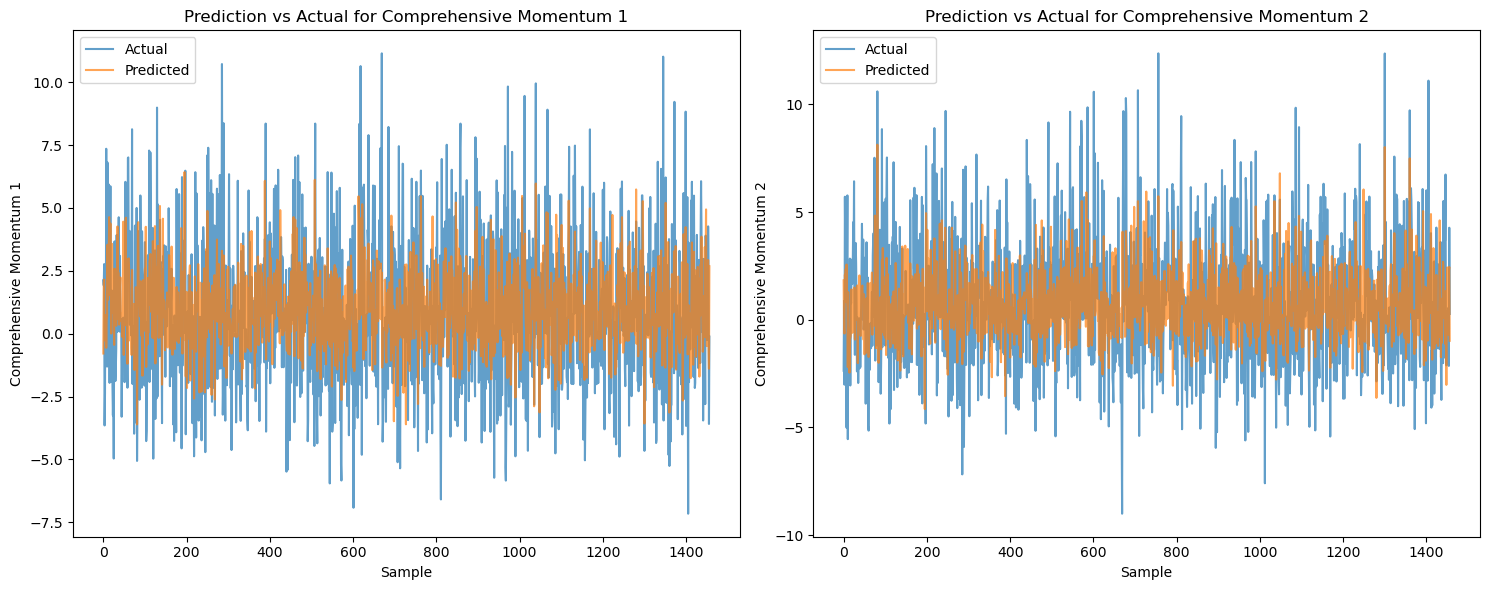

In [5]:
"""
可视化预测数据与实际数据的曲线
"""
plt.figure(figsize=(15, 6))

# 对于 comprehensive_momentum_1
plt.subplot(1, 2, 1)  # 1行2列的图表中的第一个
plt.plot(y_test['comprehensive_momentum_1'].values, label='Actual', alpha=0.7)
plt.plot(y_pred[:, 0], label='Predicted', alpha=0.7)
plt.title('Prediction vs Actual for Comprehensive Momentum 1')
plt.xlabel('Sample')
plt.ylabel('Comprehensive Momentum 1')
plt.legend()

# 对于 comprehensive_momentum_2
plt.subplot(1, 2, 2)  # 1行2列的图表中的第二个
plt.plot(y_test['comprehensive_momentum_2'].values, label='Actual', alpha=0.7)
plt.plot(y_pred[:, 1], label='Predicted', alpha=0.7)
plt.title('Prediction vs Actual for Comprehensive Momentum 2')
plt.xlabel('Sample')
plt.ylabel('Comprehensive Momentum 2')
plt.legend()

plt.tight_layout()
plt.show()

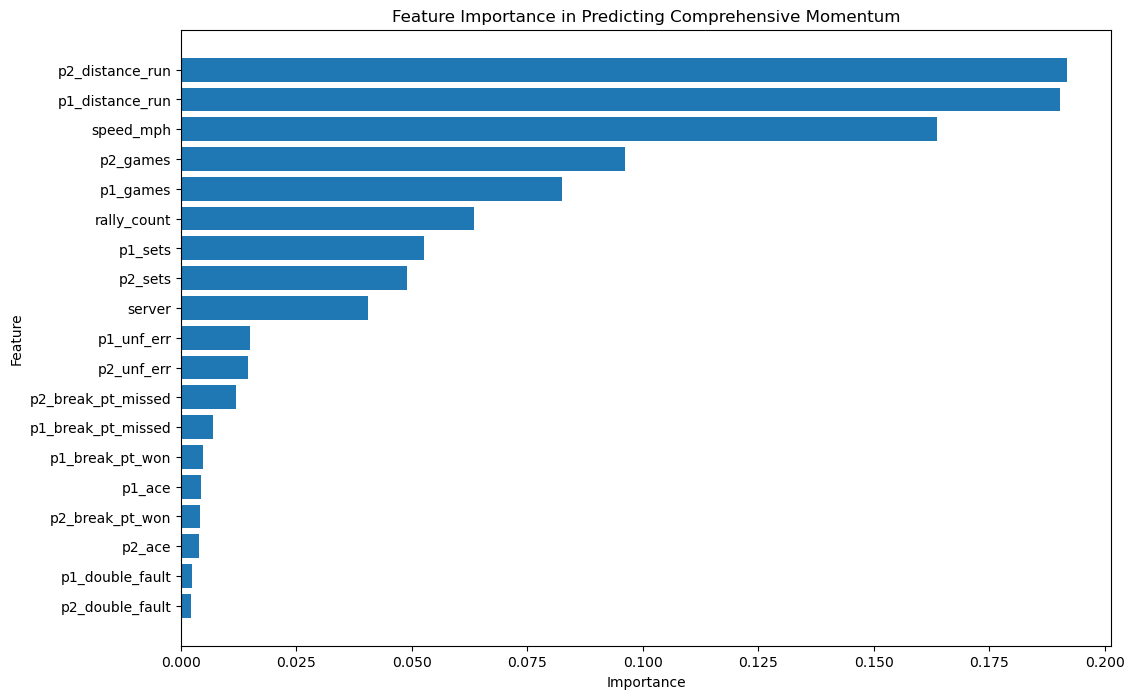

In [6]:
"""
特征重要性
"""
feature_importances = model.feature_importances_

# 将特征和其重要性组合为DataFrame
feature_importance_df = pd.DataFrame({'Feature': feature_columns, 'Importance': feature_importances})

# 排序特征重要性
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# 可视化特征重要性
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Predicting Comprehensive Momentum')
plt.gca().invert_yaxis()
plt.show()

In [14]:
new_feature = feature_importance_df[:9]
feature_columns = new_feature.Feature

R² score: 0.125972045204215


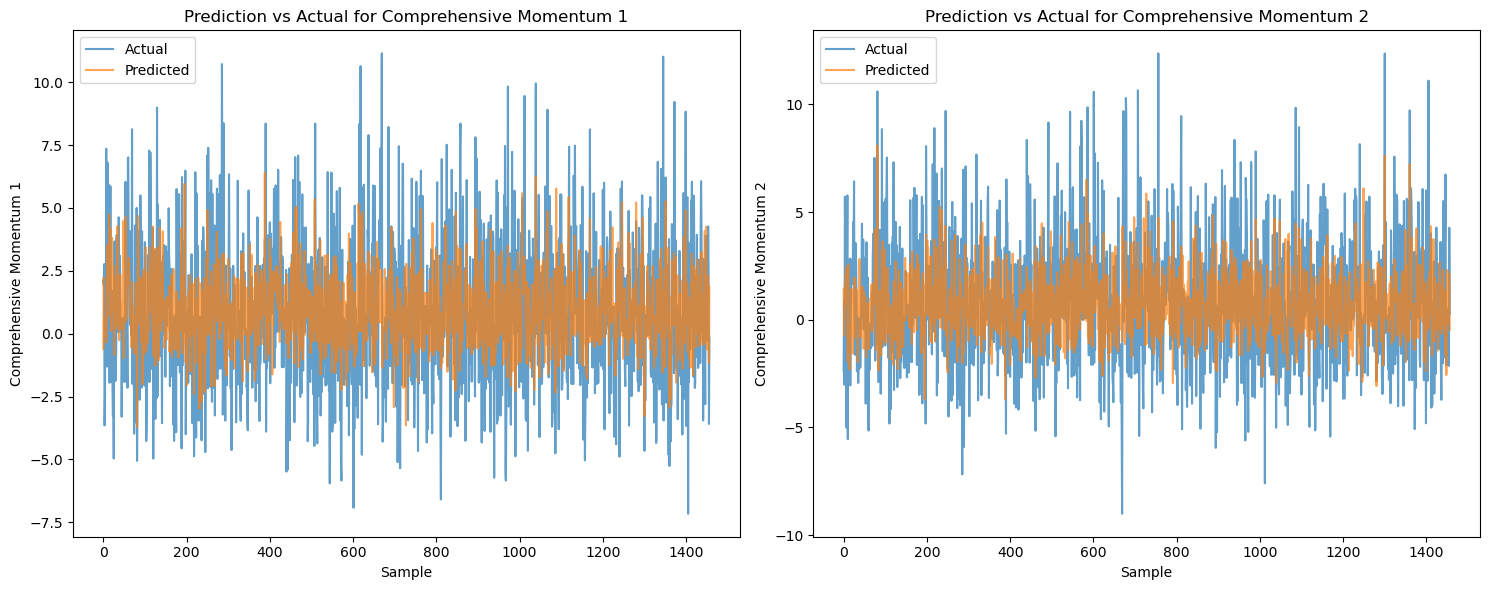

In [16]:
# 新特征
# X_train_new = combined_train_df[new_feature]
# X_test_new = combined_test_df[new_feature]
# y_train_new = combined_train_df[['comprehensive_momentum_1', 'comprehensive_momentum_2']]
# y_test_new = combined_test_df[['comprehensive_momentum_1', 'comprehensive_momentum_2']]

# # 特征标准化
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)


y = combined_df[['comprehensive_momentum_1', 'comprehensive_momentum_2']]
X = combined_df[feature_columns].copy()
for feature in feature_columns:
    X[feature].fillna(X[feature].mean(), inplace=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 数据拆分
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)





model = RandomForestRegressor()

# 训练模型
model.fit(X_train, y_train)

# 测试集预测
y_pred = model.predict(X_test)

# 使用 R² score 作为评估指标
r2 = r2_score(y_test, y_pred)
print("R² score:", r2)

plt.figure(figsize=(15, 6))

# 对于 comprehensive_momentum_1
plt.subplot(1, 2, 1)  # 1行2列的图表中的第一个
plt.plot(y_test['comprehensive_momentum_1'].values, label='Actual', alpha=0.7)
plt.plot(y_pred[:, 0], label='Predicted', alpha=0.7)
plt.title('Prediction vs Actual for Comprehensive Momentum 1')
plt.xlabel('Sample')
plt.ylabel('Comprehensive Momentum 1')
plt.legend()

# 对于 comprehensive_momentum_2
plt.subplot(1, 2, 2)  # 1行2列的图表中的第二个
plt.plot(y_test['comprehensive_momentum_2'].values, label='Actual', alpha=0.7)
plt.plot(y_pred[:, 1], label='Predicted', alpha=0.7)
plt.title('Prediction vs Actual for Comprehensive Momentum 2')
plt.xlabel('Sample')
plt.ylabel('Comprehensive Momentum 2')
plt.legend()

plt.tight_layout()
plt.show()

In [19]:
"""
找到交点
"""
def find_intersections_and_changes(y1, y2, threshold=5):
    intersections = []
    for i in range(1, len(y1)):
        change_1 = y1[i] - y1[i-1]
        change_2 = y2[i] - y2[i-1]
        total_change = abs(change_1) + abs(change_2)

        if total_change > threshold:
            if ((y1[i-1] > y2[i-1]) and (y1[i] < y2[i])) or ((y1[i-1] < y2[i-1]) and (y1[i] > y2[i])):
                intersection_x = i
                intersection_y = y1[i] + (y2[i] - y1[i]) / 2
                intersections.append((intersection_x, intersection_y, change_1, change_2))
    return intersections


Match: 2023-wimbledon-1301.csv
Intersection 1: (x=51, y=0.77) - Change in Momentum 1: -2.68, Change in Momentum 2: 2.57
Match: 2023-wimbledon-1301.csv
Intersection 2: (x=52, y=0.9) - Change in Momentum 1: 5.92, Change in Momentum 2: -5.66
Match: 2023-wimbledon-1301.csv
Intersection 3: (x=63, y=1.49) - Change in Momentum 1: 4.15, Change in Momentum 2: -1.68
Match: 2023-wimbledon-1301.csv
Intersection 4: (x=232, y=0.2) - Change in Momentum 1: 1.85, Change in Momentum 2: -3.33
Match: 2023-wimbledon-1301.csv
Intersection 5: (x=249, y=1.45) - Change in Momentum 1: 3.70, Change in Momentum 2: -3.55
Match: 2023-wimbledon-1301.csv
Intersection 6: (x=263, y=0.97) - Change in Momentum 1: -4.14, Change in Momentum 2: 4.43
Match: 2023-wimbledon-1301.csv
Intersection 7: (x=264, y=1.12) - Change in Momentum 1: 5.13, Change in Momentum 2: -4.83
Match: 2023-wimbledon-1301.csv
Intersection 8: (x=297, y=0.3) - Change in Momentum 1: -3.79, Change in Momentum 2: 2.13


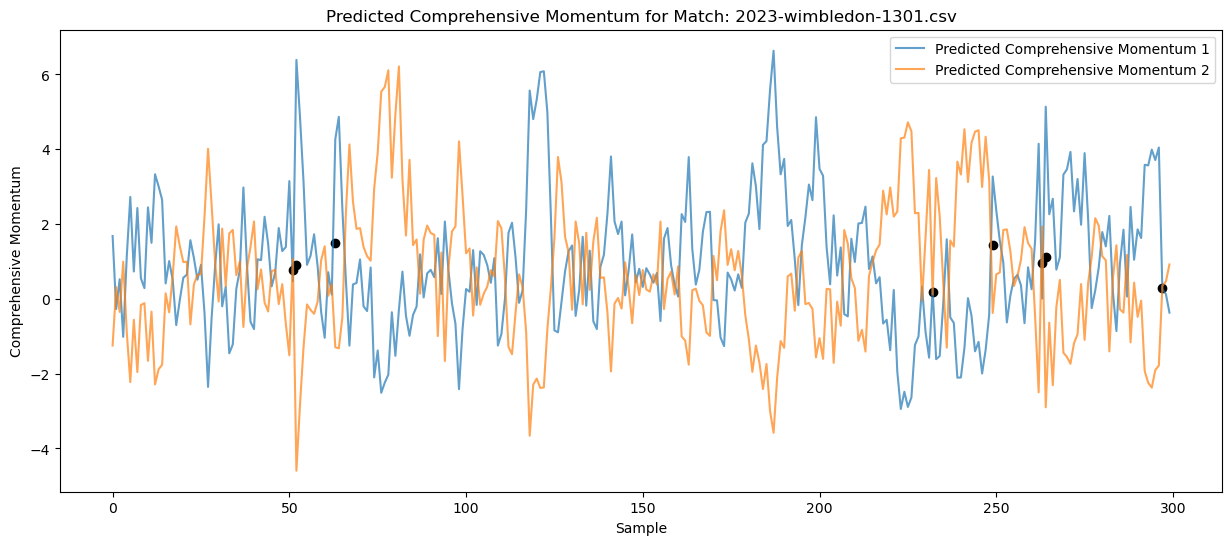

Match: 2023-wimbledon-1302.csv
Intersection 1: (x=26, y=0.57) - Change in Momentum 1: 2.23, Change in Momentum 2: -2.85
Match: 2023-wimbledon-1302.csv
Intersection 2: (x=35, y=0.4) - Change in Momentum 1: 2.78, Change in Momentum 2: -3.51
Match: 2023-wimbledon-1302.csv
Intersection 3: (x=77, y=0.91) - Change in Momentum 1: -5.01, Change in Momentum 2: 4.68
Match: 2023-wimbledon-1302.csv
Intersection 4: (x=78, y=0.69) - Change in Momentum 1: 2.55, Change in Momentum 2: -2.99
Match: 2023-wimbledon-1302.csv
Intersection 5: (x=102, y=0.85) - Change in Momentum 1: 3.71, Change in Momentum 2: -3.80
Match: 2023-wimbledon-1302.csv
Intersection 6: (x=107, y=0.56) - Change in Momentum 1: -3.16, Change in Momentum 2: 2.82
Match: 2023-wimbledon-1302.csv
Intersection 7: (x=108, y=0.25) - Change in Momentum 1: 2.50, Change in Momentum 2: -3.14
Match: 2023-wimbledon-1302.csv
Intersection 8: (x=109, y=0.91) - Change in Momentum 1: -2.67, Change in Momentum 2: 3.99
Match: 2023-wimbledon-1302.csv
Inters

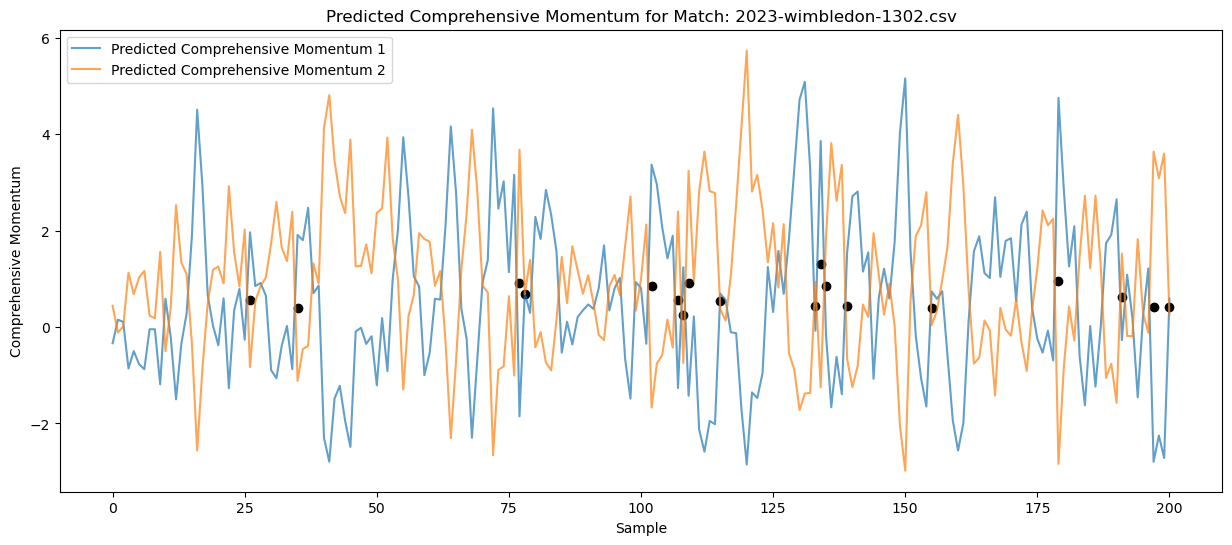

Match: 2023-wimbledon-1303.csv
Intersection 1: (x=7, y=0.63) - Change in Momentum 1: 2.55, Change in Momentum 2: -2.91
Match: 2023-wimbledon-1303.csv
Intersection 2: (x=35, y=0.38) - Change in Momentum 1: 3.40, Change in Momentum 2: -4.21
Match: 2023-wimbledon-1303.csv
Intersection 3: (x=61, y=2.27) - Change in Momentum 1: -2.41, Change in Momentum 2: 5.05
Match: 2023-wimbledon-1303.csv
Intersection 4: (x=99, y=0.94) - Change in Momentum 1: 4.22, Change in Momentum 2: -3.42
Match: 2023-wimbledon-1303.csv
Intersection 5: (x=122, y=1.08) - Change in Momentum 1: -3.17, Change in Momentum 2: 4.25
Match: 2023-wimbledon-1303.csv
Intersection 6: (x=123, y=0.98) - Change in Momentum 1: 5.61, Change in Momentum 2: -5.81
Match: 2023-wimbledon-1303.csv
Intersection 7: (x=124, y=0.78) - Change in Momentum 1: -3.62, Change in Momentum 2: 3.20


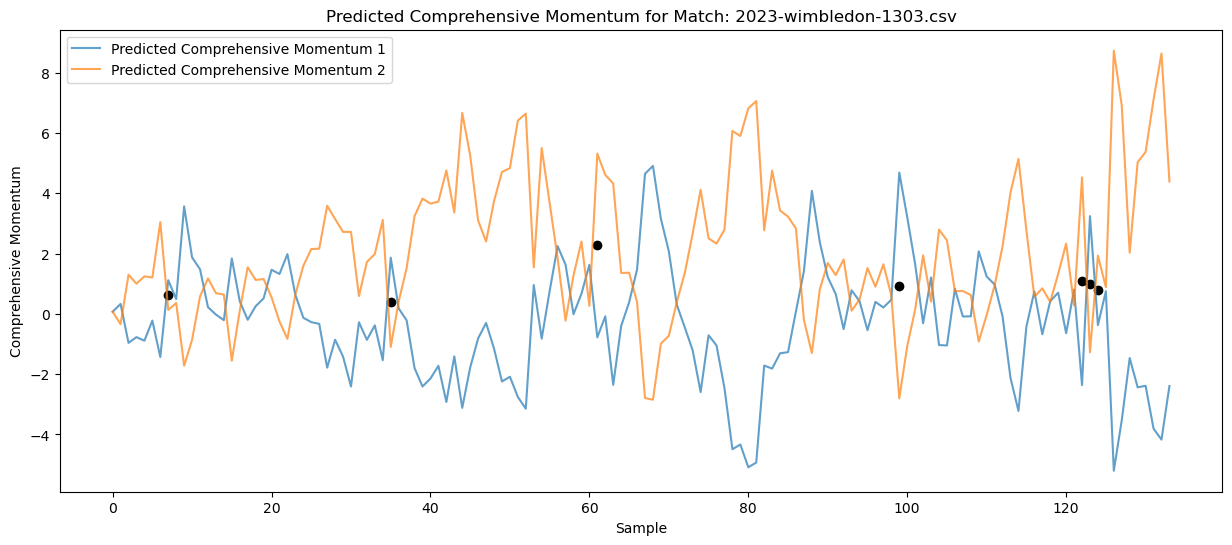

Match: 2023-wimbledon-1304.csv
Intersection 1: (x=8, y=0.87) - Change in Momentum 1: -3.32, Change in Momentum 2: 3.95
Match: 2023-wimbledon-1304.csv
Intersection 2: (x=16, y=0.33) - Change in Momentum 1: -3.75, Change in Momentum 2: 1.97
Match: 2023-wimbledon-1304.csv
Intersection 3: (x=21, y=0.33) - Change in Momentum 1: -2.62, Change in Momentum 2: 2.56
Match: 2023-wimbledon-1304.csv
Intersection 4: (x=98, y=0.65) - Change in Momentum 1: 1.91, Change in Momentum 2: -3.23
Match: 2023-wimbledon-1304.csv
Intersection 5: (x=122, y=0.94) - Change in Momentum 1: 2.78, Change in Momentum 2: -3.51
Match: 2023-wimbledon-1304.csv
Intersection 6: (x=152, y=0.44) - Change in Momentum 1: -3.26, Change in Momentum 2: 2.14
Match: 2023-wimbledon-1304.csv
Intersection 7: (x=165, y=0.8) - Change in Momentum 1: 3.05, Change in Momentum 2: -2.17
Match: 2023-wimbledon-1304.csv
Intersection 8: (x=179, y=0.33) - Change in Momentum 1: -3.10, Change in Momentum 2: 2.06
Match: 2023-wimbledon-1304.csv
Interse

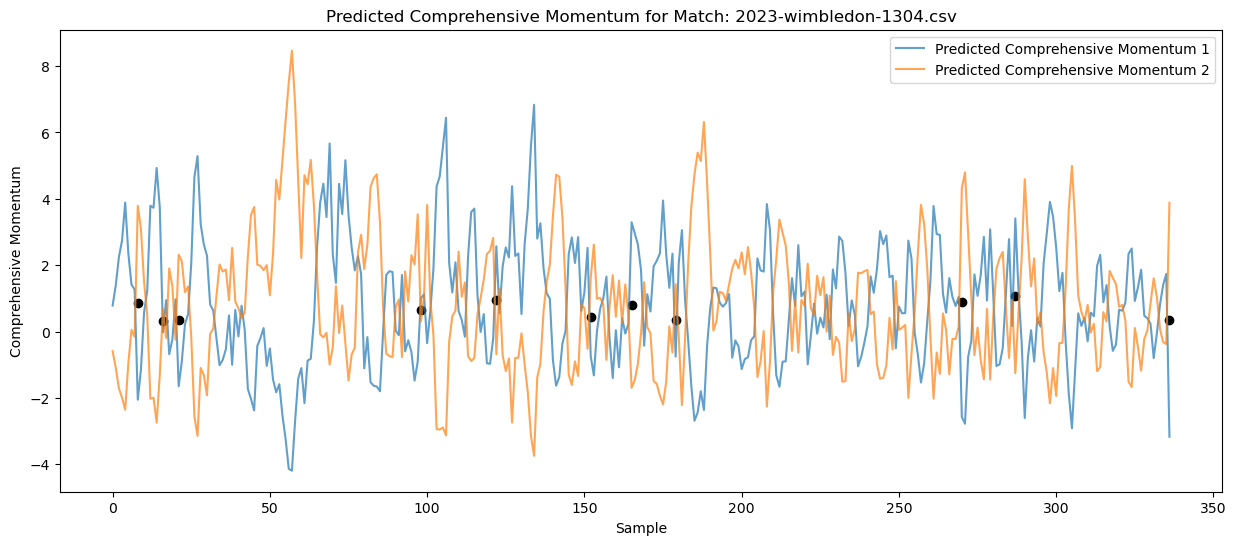

Match: 2023-wimbledon-1305.csv
Intersection 1: (x=13, y=0.44) - Change in Momentum 1: -2.79, Change in Momentum 2: 2.95
Match: 2023-wimbledon-1305.csv
Intersection 2: (x=24, y=0.53) - Change in Momentum 1: 3.03, Change in Momentum 2: -4.23
Match: 2023-wimbledon-1305.csv
Intersection 3: (x=29, y=0.42) - Change in Momentum 1: 2.87, Change in Momentum 2: -4.70
Match: 2023-wimbledon-1305.csv
Intersection 4: (x=74, y=0.72) - Change in Momentum 1: 2.99, Change in Momentum 2: -2.53
Match: 2023-wimbledon-1305.csv
Intersection 5: (x=75, y=0.72) - Change in Momentum 1: -3.85, Change in Momentum 2: 3.85
Match: 2023-wimbledon-1305.csv
Intersection 6: (x=92, y=0.19) - Change in Momentum 1: -3.07, Change in Momentum 2: 2.42
Match: 2023-wimbledon-1305.csv
Intersection 7: (x=93, y=0.72) - Change in Momentum 1: 3.82, Change in Momentum 2: -2.77
Match: 2023-wimbledon-1305.csv
Intersection 8: (x=113, y=0.78) - Change in Momentum 1: 3.17, Change in Momentum 2: -2.89
Match: 2023-wimbledon-1305.csv
Intersec

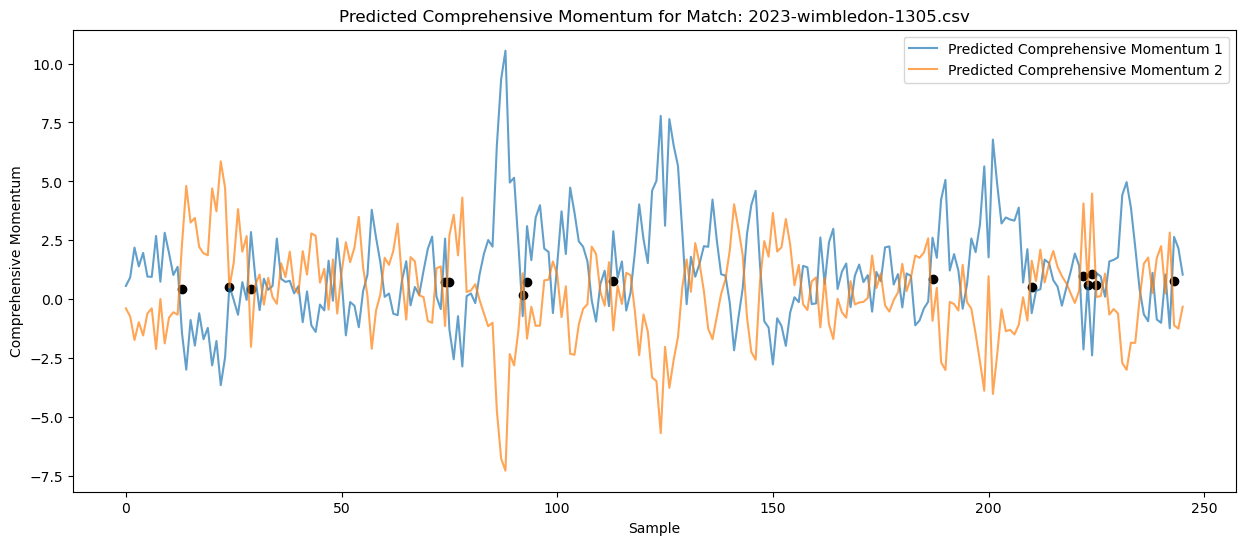

Match: 2023-wimbledon-1306.csv
Intersection 1: (x=60, y=0.81) - Change in Momentum 1: 3.08, Change in Momentum 2: -3.19
Match: 2023-wimbledon-1306.csv
Intersection 2: (x=70, y=0.51) - Change in Momentum 1: 2.36, Change in Momentum 2: -3.17
Match: 2023-wimbledon-1306.csv
Intersection 3: (x=81, y=1.0) - Change in Momentum 1: 5.68, Change in Momentum 2: -5.17
Match: 2023-wimbledon-1306.csv
Intersection 4: (x=98, y=1.03) - Change in Momentum 1: 5.64, Change in Momentum 2: -5.39
Match: 2023-wimbledon-1306.csv
Intersection 5: (x=134, y=1.32) - Change in Momentum 1: 2.98, Change in Momentum 2: -2.88
Match: 2023-wimbledon-1306.csv
Intersection 6: (x=143, y=1.57) - Change in Momentum 1: -2.85, Change in Momentum 2: 2.16
Match: 2023-wimbledon-1306.csv
Intersection 7: (x=166, y=0.9) - Change in Momentum 1: 3.03, Change in Momentum 2: -2.72
Match: 2023-wimbledon-1306.csv
Intersection 8: (x=167, y=0.5) - Change in Momentum 1: -3.78, Change in Momentum 2: 2.98
Match: 2023-wimbledon-1306.csv
Intersec

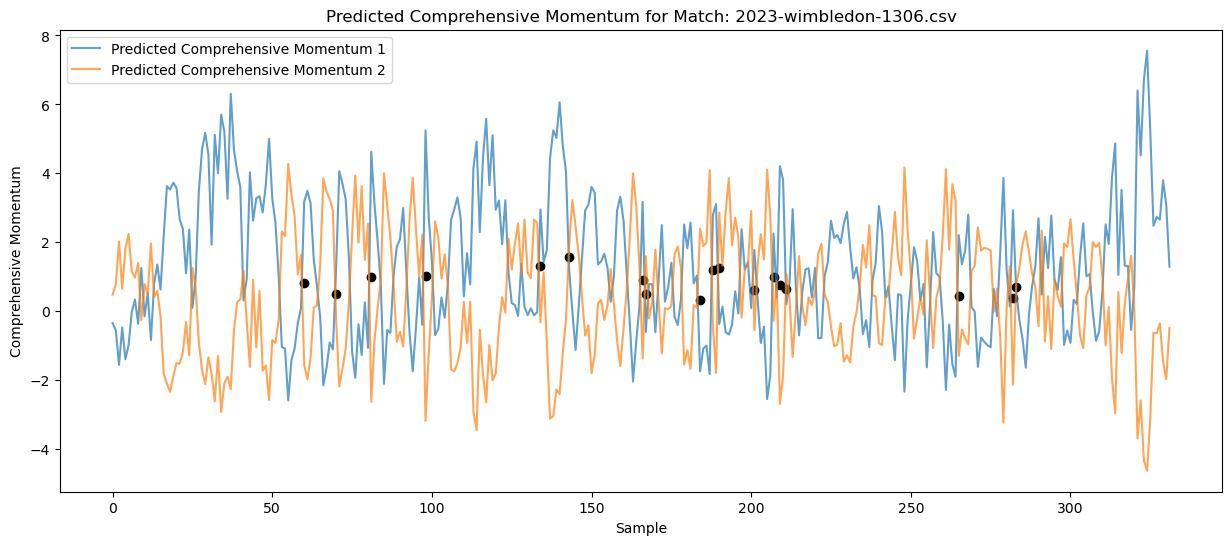

Match: 2023-wimbledon-1307.csv
Intersection 1: (x=10, y=0.38) - Change in Momentum 1: -2.86, Change in Momentum 2: 2.37
Match: 2023-wimbledon-1307.csv
Intersection 2: (x=26, y=0.89) - Change in Momentum 1: 4.15, Change in Momentum 2: -4.14
Match: 2023-wimbledon-1307.csv
Intersection 3: (x=44, y=0.53) - Change in Momentum 1: -4.50, Change in Momentum 2: 3.60
Match: 2023-wimbledon-1307.csv
Intersection 4: (x=45, y=0.7) - Change in Momentum 1: 3.08, Change in Momentum 2: -2.72
Match: 2023-wimbledon-1307.csv
Intersection 5: (x=46, y=0.9) - Change in Momentum 1: -4.50, Change in Momentum 2: 4.88
Match: 2023-wimbledon-1307.csv
Intersection 6: (x=50, y=0.62) - Change in Momentum 1: 2.67, Change in Momentum 2: -5.09
Match: 2023-wimbledon-1307.csv
Intersection 7: (x=59, y=1.24) - Change in Momentum 1: -3.22, Change in Momentum 2: 4.00
Match: 2023-wimbledon-1307.csv
Intersection 8: (x=82, y=0.63) - Change in Momentum 1: 2.85, Change in Momentum 2: -2.44
Match: 2023-wimbledon-1307.csv
Intersectio

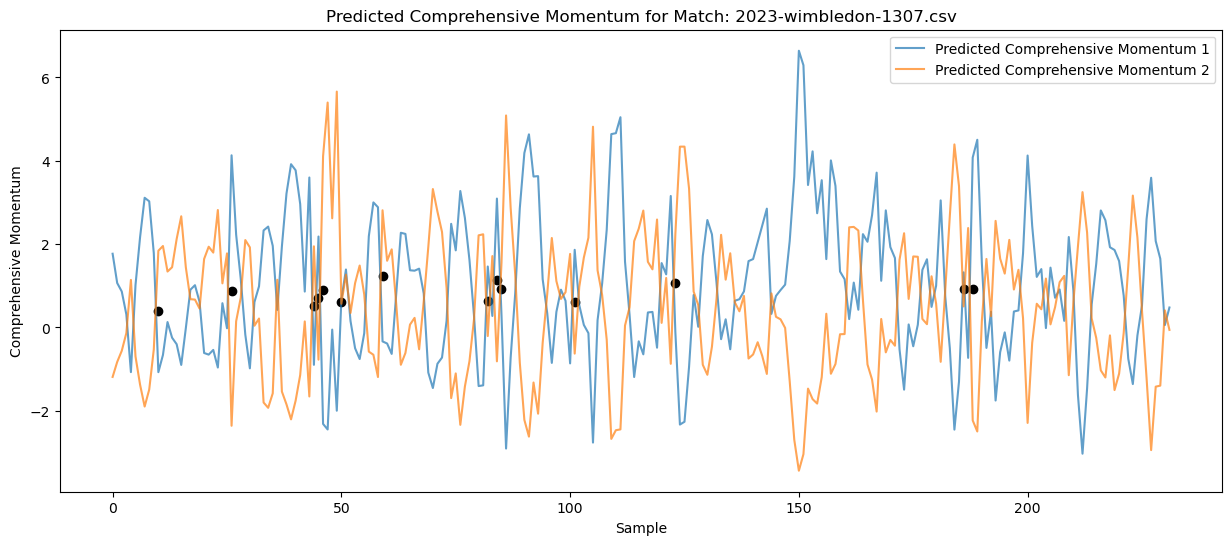

Match: 2023-wimbledon-1308.csv
Intersection 1: (x=7, y=0.47) - Change in Momentum 1: 2.93, Change in Momentum 2: -2.85
Match: 2023-wimbledon-1308.csv
Intersection 2: (x=39, y=0.91) - Change in Momentum 1: 4.53, Change in Momentum 2: -5.15
Match: 2023-wimbledon-1308.csv
Intersection 3: (x=79, y=1.35) - Change in Momentum 1: -2.74, Change in Momentum 2: 3.36
Match: 2023-wimbledon-1308.csv
Intersection 4: (x=80, y=1.24) - Change in Momentum 1: 4.33, Change in Momentum 2: -4.54
Match: 2023-wimbledon-1308.csv
Intersection 5: (x=81, y=1.33) - Change in Momentum 1: -3.38, Change in Momentum 2: 3.57
Match: 2023-wimbledon-1308.csv
Intersection 6: (x=101, y=0.86) - Change in Momentum 1: -2.79, Change in Momentum 2: 2.78
Match: 2023-wimbledon-1308.csv
Intersection 7: (x=104, y=1.0) - Change in Momentum 1: 3.92, Change in Momentum 2: -3.94
Match: 2023-wimbledon-1308.csv
Intersection 8: (x=105, y=1.58) - Change in Momentum 1: -4.71, Change in Momentum 2: 5.87
Match: 2023-wimbledon-1308.csv
Intersec

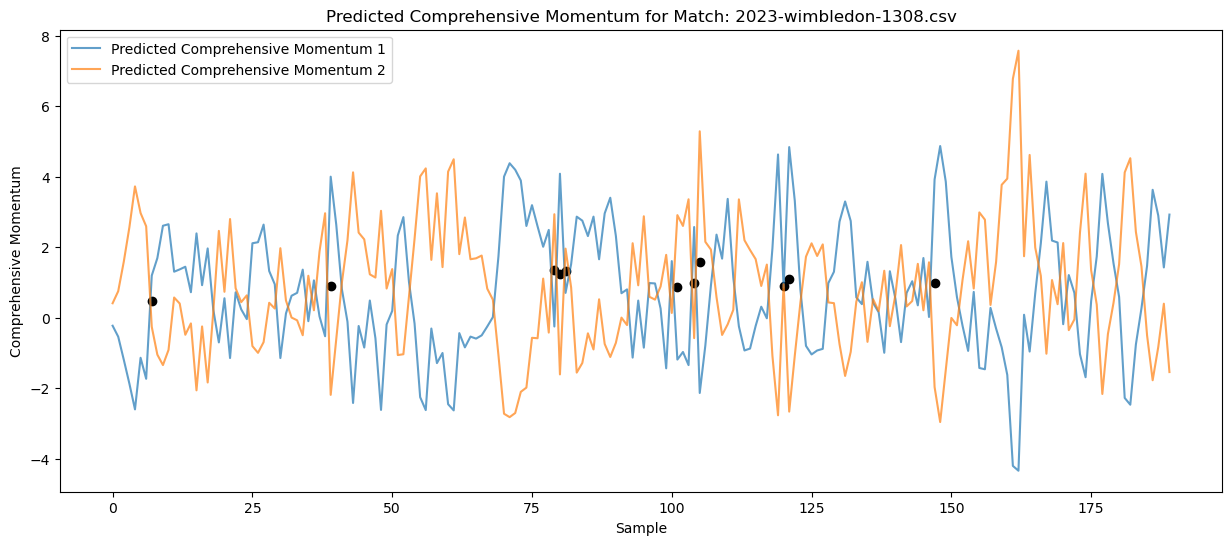

Match: 2023-wimbledon-1309.csv
Intersection 1: (x=40, y=1.64) - Change in Momentum 1: 2.64, Change in Momentum 2: -2.70
Match: 2023-wimbledon-1309.csv
Intersection 2: (x=103, y=0.32) - Change in Momentum 1: -3.35, Change in Momentum 2: 1.88
Match: 2023-wimbledon-1309.csv
Intersection 3: (x=109, y=1.47) - Change in Momentum 1: -3.23, Change in Momentum 2: 4.80
Match: 2023-wimbledon-1309.csv
Intersection 4: (x=118, y=1.03) - Change in Momentum 1: -3.96, Change in Momentum 2: 3.28
Match: 2023-wimbledon-1309.csv
Intersection 5: (x=119, y=0.94) - Change in Momentum 1: 3.40, Change in Momentum 2: -3.58
Match: 2023-wimbledon-1309.csv
Intersection 6: (x=136, y=1.62) - Change in Momentum 1: -2.70, Change in Momentum 2: 3.30
Match: 2023-wimbledon-1309.csv
Intersection 7: (x=159, y=1.02) - Change in Momentum 1: 2.52, Change in Momentum 2: -2.52
Match: 2023-wimbledon-1309.csv
Intersection 8: (x=171, y=0.04) - Change in Momentum 1: 2.68, Change in Momentum 2: -4.64
Match: 2023-wimbledon-1309.csv
In

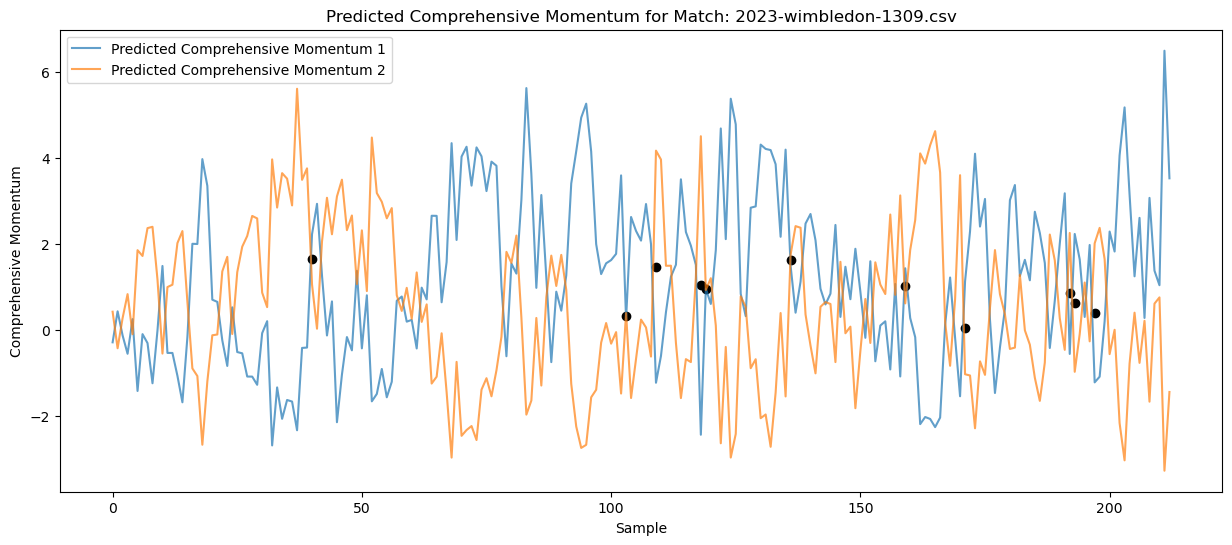

Match: 2023-wimbledon-1312.csv
Intersection 1: (x=106, y=1.64) - Change in Momentum 1: -2.85, Change in Momentum 2: 3.82
Match: 2023-wimbledon-1312.csv
Intersection 2: (x=182, y=1.04) - Change in Momentum 1: -2.89, Change in Momentum 2: 3.95
Match: 2023-wimbledon-1312.csv
Intersection 3: (x=215, y=1.95) - Change in Momentum 1: -3.47, Change in Momentum 2: 4.83
Match: 2023-wimbledon-1312.csv
Intersection 4: (x=225, y=0.49) - Change in Momentum 1: -2.86, Change in Momentum 2: 2.86
Match: 2023-wimbledon-1312.csv
Intersection 5: (x=253, y=0.9) - Change in Momentum 1: 3.23, Change in Momentum 2: -2.62
Match: 2023-wimbledon-1312.csv
Intersection 6: (x=262, y=0.77) - Change in Momentum 1: 2.48, Change in Momentum 2: -3.08


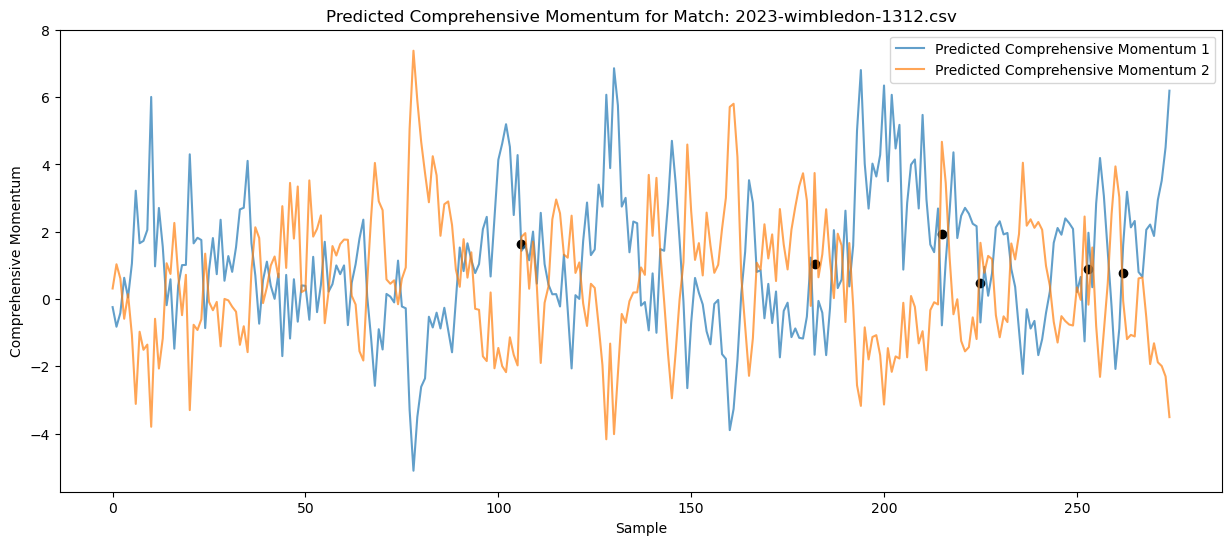

Match: 2023-wimbledon-1313.csv
Intersection 1: (x=32, y=0.24) - Change in Momentum 1: 0.67, Change in Momentum 2: -4.41
Match: 2023-wimbledon-1313.csv
Intersection 2: (x=34, y=0.12) - Change in Momentum 1: 1.89, Change in Momentum 2: -4.31
Match: 2023-wimbledon-1313.csv
Intersection 3: (x=50, y=0.56) - Change in Momentum 1: -3.76, Change in Momentum 2: 2.40
Match: 2023-wimbledon-1313.csv
Intersection 4: (x=64, y=0.65) - Change in Momentum 1: 2.00, Change in Momentum 2: -3.39
Match: 2023-wimbledon-1313.csv
Intersection 5: (x=67, y=0.92) - Change in Momentum 1: -3.02, Change in Momentum 2: 3.12
Match: 2023-wimbledon-1313.csv
Intersection 6: (x=96, y=0.89) - Change in Momentum 1: -3.01, Change in Momentum 2: 2.53
Match: 2023-wimbledon-1313.csv
Intersection 7: (x=102, y=0.58) - Change in Momentum 1: 3.71, Change in Momentum 2: -4.26
Match: 2023-wimbledon-1313.csv
Intersection 8: (x=185, y=0.76) - Change in Momentum 1: -3.64, Change in Momentum 2: 4.34
Match: 2023-wimbledon-1313.csv
Interse

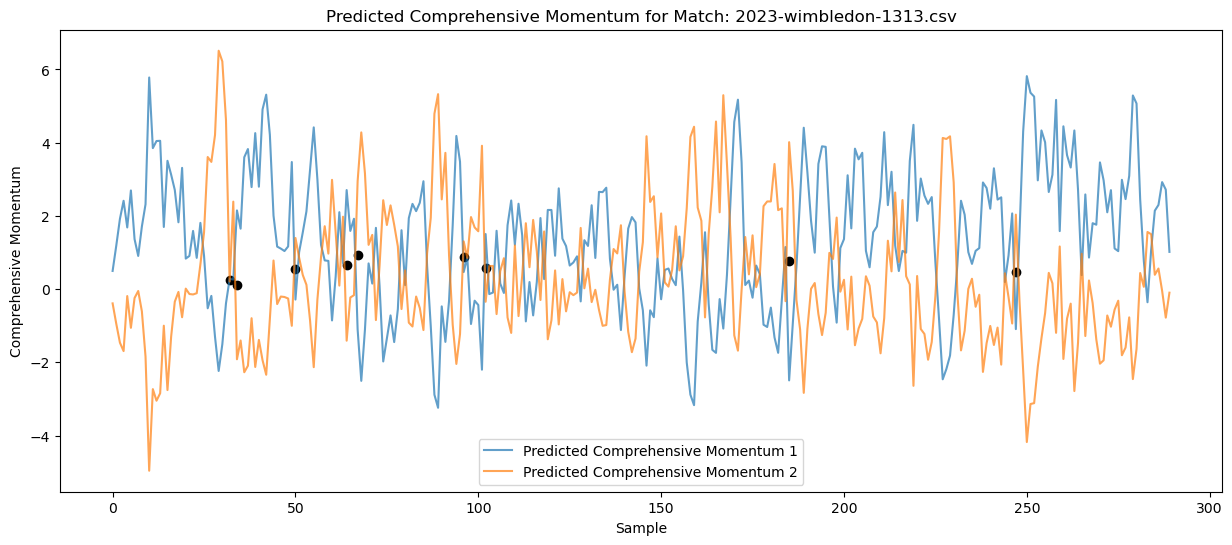

Match: 2023-wimbledon-1314.csv
Intersection 1: (x=6, y=0.71) - Change in Momentum 1: 3.30, Change in Momentum 2: -3.40
Match: 2023-wimbledon-1314.csv
Intersection 2: (x=9, y=0.39) - Change in Momentum 1: 2.41, Change in Momentum 2: -2.88
Match: 2023-wimbledon-1314.csv
Intersection 3: (x=144, y=0.52) - Change in Momentum 1: 2.37, Change in Momentum 2: -3.02


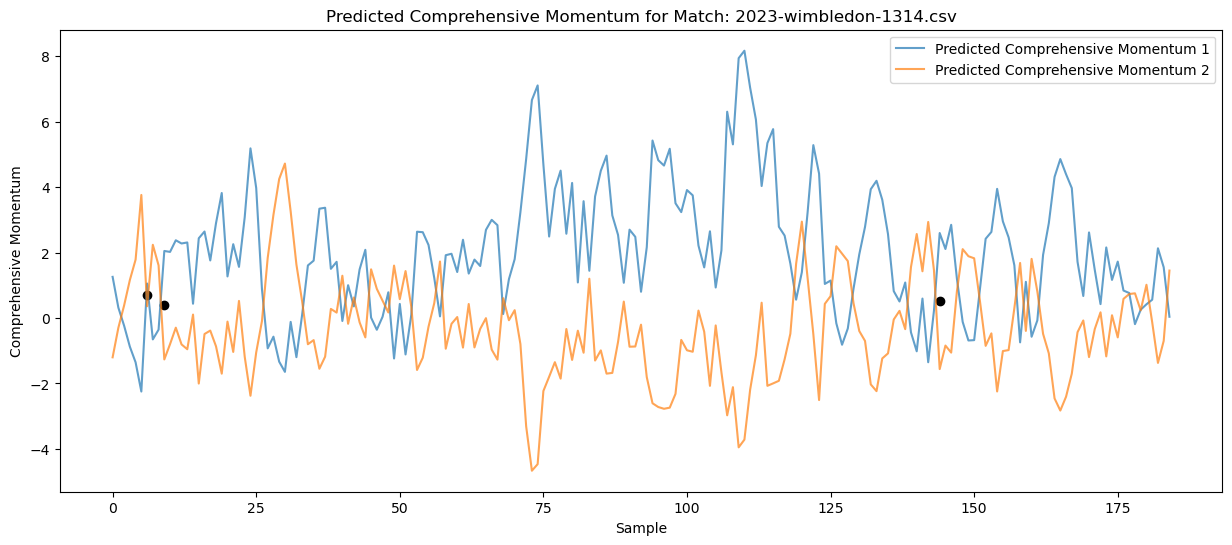

Match: 2023-wimbledon-1315.csv
Intersection 1: (x=8, y=0.4) - Change in Momentum 1: 2.40, Change in Momentum 2: -2.72
Match: 2023-wimbledon-1315.csv
Intersection 2: (x=45, y=0.8) - Change in Momentum 1: -3.43, Change in Momentum 2: 3.76
Match: 2023-wimbledon-1315.csv
Intersection 3: (x=51, y=0.19) - Change in Momentum 1: -3.12, Change in Momentum 2: 2.94
Match: 2023-wimbledon-1315.csv
Intersection 4: (x=56, y=0.56) - Change in Momentum 1: 2.36, Change in Momentum 2: -2.68
Match: 2023-wimbledon-1315.csv
Intersection 5: (x=67, y=0.36) - Change in Momentum 1: 2.65, Change in Momentum 2: -2.53
Match: 2023-wimbledon-1315.csv
Intersection 6: (x=151, y=0.51) - Change in Momentum 1: 2.18, Change in Momentum 2: -4.25
Match: 2023-wimbledon-1315.csv
Intersection 7: (x=167, y=0.81) - Change in Momentum 1: 3.17, Change in Momentum 2: -4.10
Match: 2023-wimbledon-1315.csv
Intersection 8: (x=177, y=0.75) - Change in Momentum 1: 3.32, Change in Momentum 2: -4.01


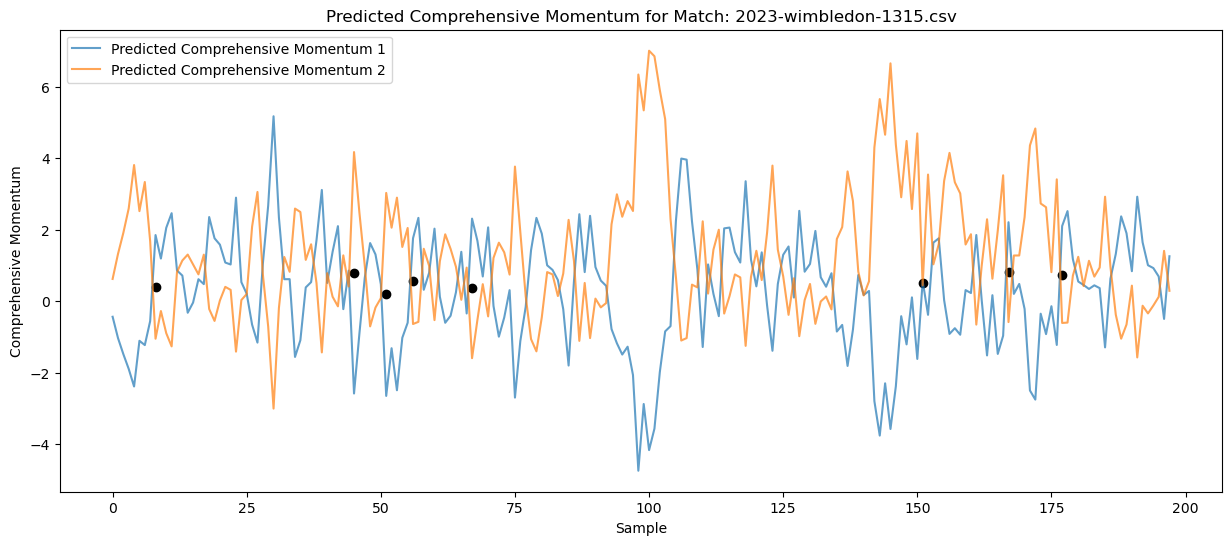

Match: 2023-wimbledon-1316.csv
Intersection 1: (x=30, y=0.95) - Change in Momentum 1: -2.66, Change in Momentum 2: 3.29
Match: 2023-wimbledon-1316.csv
Intersection 2: (x=80, y=0.62) - Change in Momentum 1: 1.43, Change in Momentum 2: -3.82
Match: 2023-wimbledon-1316.csv
Intersection 3: (x=108, y=0.62) - Change in Momentum 1: -3.77, Change in Momentum 2: 2.73
Match: 2023-wimbledon-1316.csv
Intersection 4: (x=131, y=0.48) - Change in Momentum 1: 2.91, Change in Momentum 2: -3.56
Match: 2023-wimbledon-1316.csv
Intersection 5: (x=137, y=0.72) - Change in Momentum 1: -3.99, Change in Momentum 2: 4.02
Match: 2023-wimbledon-1316.csv
Intersection 6: (x=163, y=0.39) - Change in Momentum 1: 4.13, Change in Momentum 2: -3.72


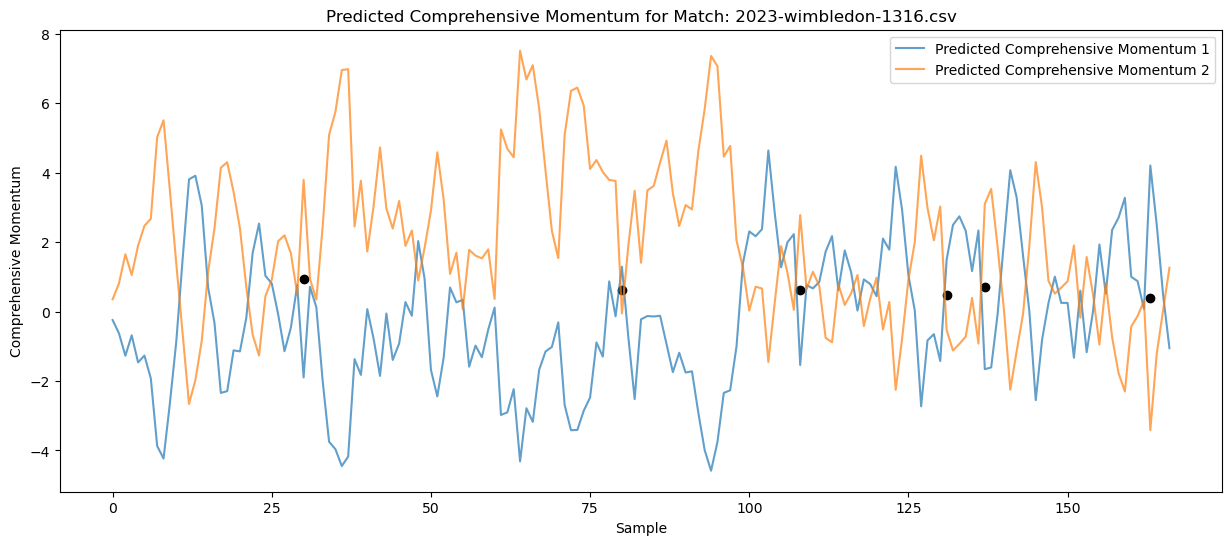

Match: 2023-wimbledon-1401.csv
Intersection 1: (x=8, y=0.67) - Change in Momentum 1: -2.59, Change in Momentum 2: 3.75
Match: 2023-wimbledon-1401.csv
Intersection 2: (x=13, y=0.33) - Change in Momentum 1: 3.05, Change in Momentum 2: -2.85
Match: 2023-wimbledon-1401.csv
Intersection 3: (x=56, y=0.93) - Change in Momentum 1: -2.68, Change in Momentum 2: 4.24
Match: 2023-wimbledon-1401.csv
Intersection 4: (x=67, y=0.97) - Change in Momentum 1: -2.67, Change in Momentum 2: 3.57
Match: 2023-wimbledon-1401.csv
Intersection 5: (x=116, y=1.05) - Change in Momentum 1: 4.22, Change in Momentum 2: -4.42
Match: 2023-wimbledon-1401.csv
Intersection 6: (x=166, y=0.42) - Change in Momentum 1: 2.66, Change in Momentum 2: -2.45
Match: 2023-wimbledon-1401.csv
Intersection 7: (x=213, y=0.55) - Change in Momentum 1: -4.40, Change in Momentum 2: 3.21


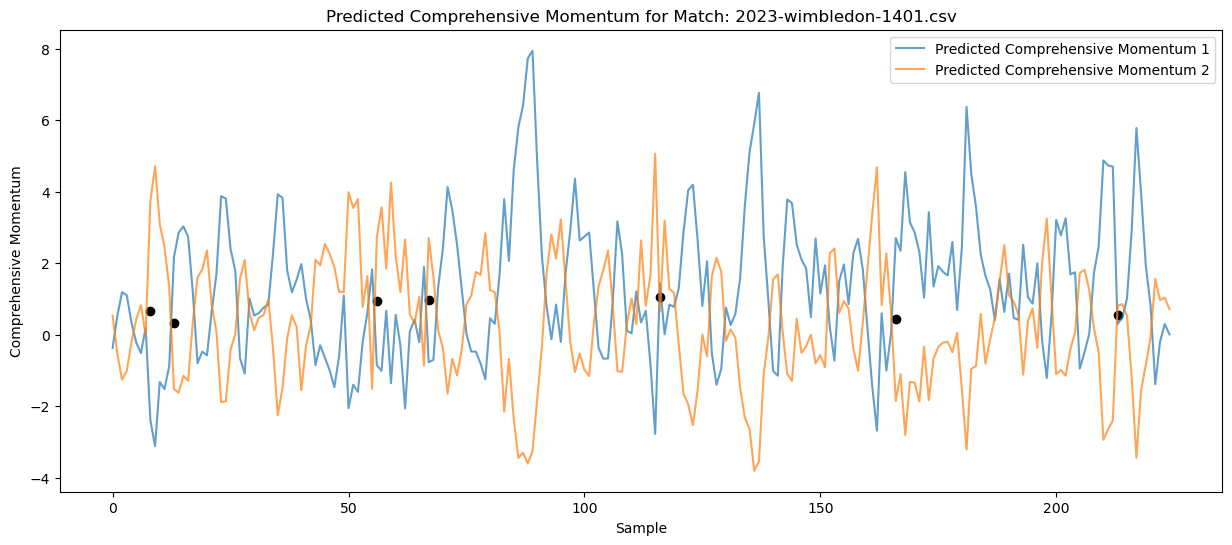

Match: 2023-wimbledon-1402.csv
Intersection 1: (x=10, y=0.38) - Change in Momentum 1: 2.89, Change in Momentum 2: -2.29
Match: 2023-wimbledon-1402.csv
Intersection 2: (x=16, y=0.72) - Change in Momentum 1: -2.24, Change in Momentum 2: 3.03
Match: 2023-wimbledon-1402.csv
Intersection 3: (x=23, y=0.89) - Change in Momentum 1: -2.57, Change in Momentum 2: 2.61
Match: 2023-wimbledon-1402.csv
Intersection 4: (x=55, y=0.47) - Change in Momentum 1: 2.62, Change in Momentum 2: -2.53
Match: 2023-wimbledon-1402.csv
Intersection 5: (x=66, y=0.1) - Change in Momentum 1: -3.38, Change in Momentum 2: 2.20
Match: 2023-wimbledon-1402.csv
Intersection 6: (x=82, y=0.58) - Change in Momentum 1: 1.98, Change in Momentum 2: -3.17
Match: 2023-wimbledon-1402.csv
Intersection 7: (x=116, y=0.7) - Change in Momentum 1: -2.79, Change in Momentum 2: 2.69
Match: 2023-wimbledon-1402.csv
Intersection 8: (x=184, y=0.9) - Change in Momentum 1: -3.84, Change in Momentum 2: 3.93
Match: 2023-wimbledon-1402.csv
Intersecti

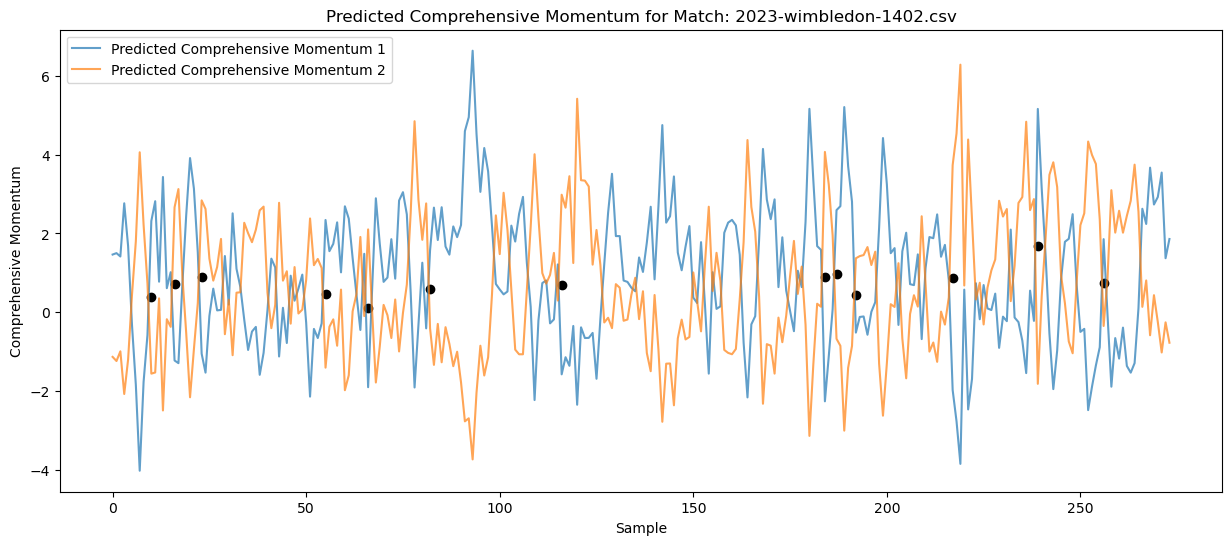

Match: 2023-wimbledon-1403.csv
Intersection 1: (x=18, y=1.05) - Change in Momentum 1: -2.64, Change in Momentum 2: 2.82
Match: 2023-wimbledon-1403.csv
Intersection 2: (x=42, y=0.85) - Change in Momentum 1: 4.08, Change in Momentum 2: -4.45
Match: 2023-wimbledon-1403.csv
Intersection 3: (x=62, y=0.9) - Change in Momentum 1: -3.13, Change in Momentum 2: 2.97
Match: 2023-wimbledon-1403.csv
Intersection 4: (x=63, y=0.93) - Change in Momentum 1: 2.64, Change in Momentum 2: -2.59


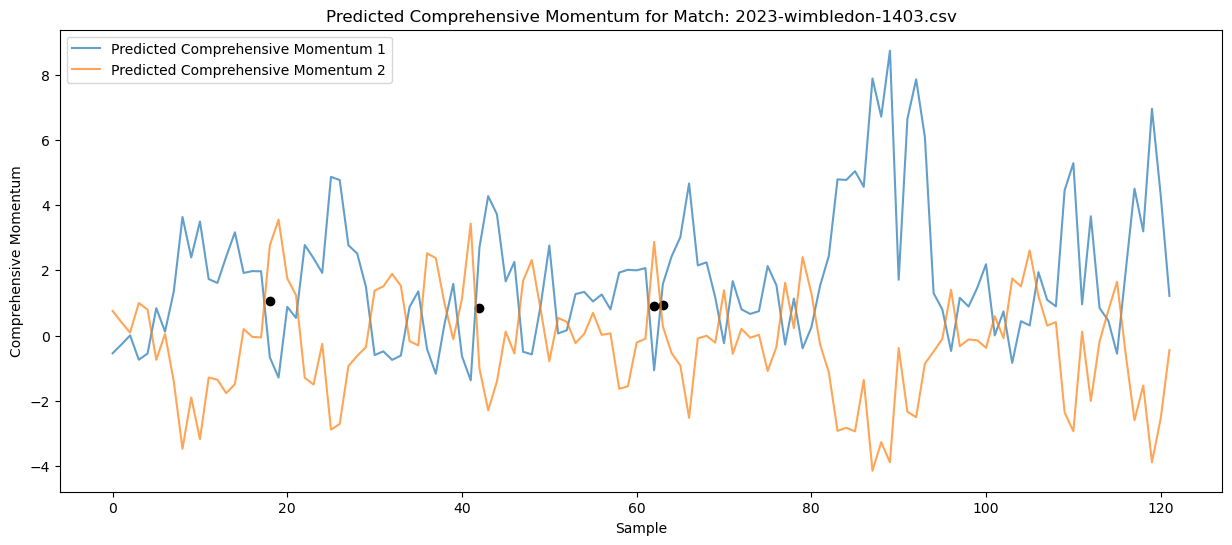

Match: 2023-wimbledon-1404.csv
Intersection 1: (x=7, y=0.56) - Change in Momentum 1: -2.54, Change in Momentum 2: 2.68
Match: 2023-wimbledon-1404.csv
Intersection 2: (x=8, y=1.04) - Change in Momentum 1: 3.63, Change in Momentum 2: -2.67
Match: 2023-wimbledon-1404.csv
Intersection 3: (x=59, y=1.57) - Change in Momentum 1: -2.16, Change in Momentum 2: 3.47
Match: 2023-wimbledon-1404.csv
Intersection 4: (x=74, y=0.67) - Change in Momentum 1: 2.53, Change in Momentum 2: -2.59
Match: 2023-wimbledon-1404.csv
Intersection 5: (x=106, y=0.57) - Change in Momentum 1: 2.85, Change in Momentum 2: -3.45
Match: 2023-wimbledon-1404.csv
Intersection 6: (x=119, y=0.39) - Change in Momentum 1: 3.40, Change in Momentum 2: -3.88
Match: 2023-wimbledon-1404.csv
Intersection 7: (x=148, y=0.94) - Change in Momentum 1: -4.79, Change in Momentum 2: 5.02
Match: 2023-wimbledon-1404.csv
Intersection 8: (x=150, y=0.65) - Change in Momentum 1: 4.10, Change in Momentum 2: -5.08
Match: 2023-wimbledon-1404.csv
Interse

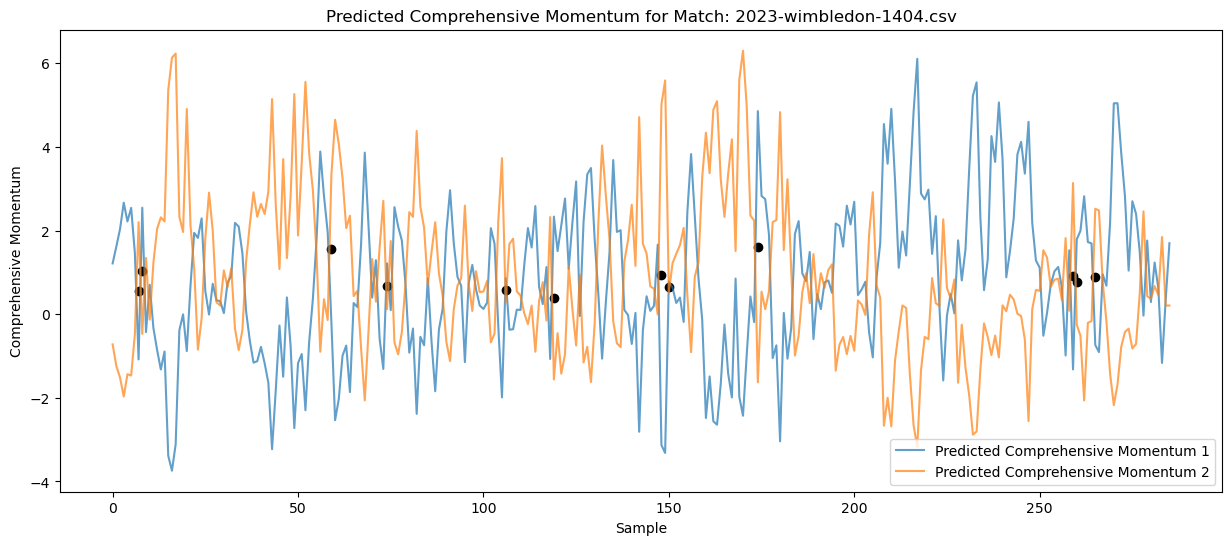

Match: 2023-wimbledon-1405.csv
Intersection 1: (x=76, y=0.72) - Change in Momentum 1: -3.22, Change in Momentum 2: 2.95
Match: 2023-wimbledon-1405.csv
Intersection 2: (x=77, y=0.48) - Change in Momentum 1: 2.31, Change in Momentum 2: -2.79
Match: 2023-wimbledon-1405.csv
Intersection 3: (x=114, y=1.15) - Change in Momentum 1: 3.80, Change in Momentum 2: -4.95
Match: 2023-wimbledon-1405.csv
Intersection 4: (x=133, y=0.61) - Change in Momentum 1: 2.55, Change in Momentum 2: -2.90
Match: 2023-wimbledon-1405.csv
Intersection 5: (x=134, y=0.91) - Change in Momentum 1: -2.82, Change in Momentum 2: 3.44
Match: 2023-wimbledon-1405.csv
Intersection 6: (x=135, y=0.75) - Change in Momentum 1: 2.57, Change in Momentum 2: -2.90
Match: 2023-wimbledon-1405.csv
Intersection 7: (x=147, y=0.76) - Change in Momentum 1: -4.18, Change in Momentum 2: 3.77
Match: 2023-wimbledon-1405.csv
Intersection 8: (x=153, y=0.88) - Change in Momentum 1: 4.96, Change in Momentum 2: -4.24
Match: 2023-wimbledon-1405.csv
Int

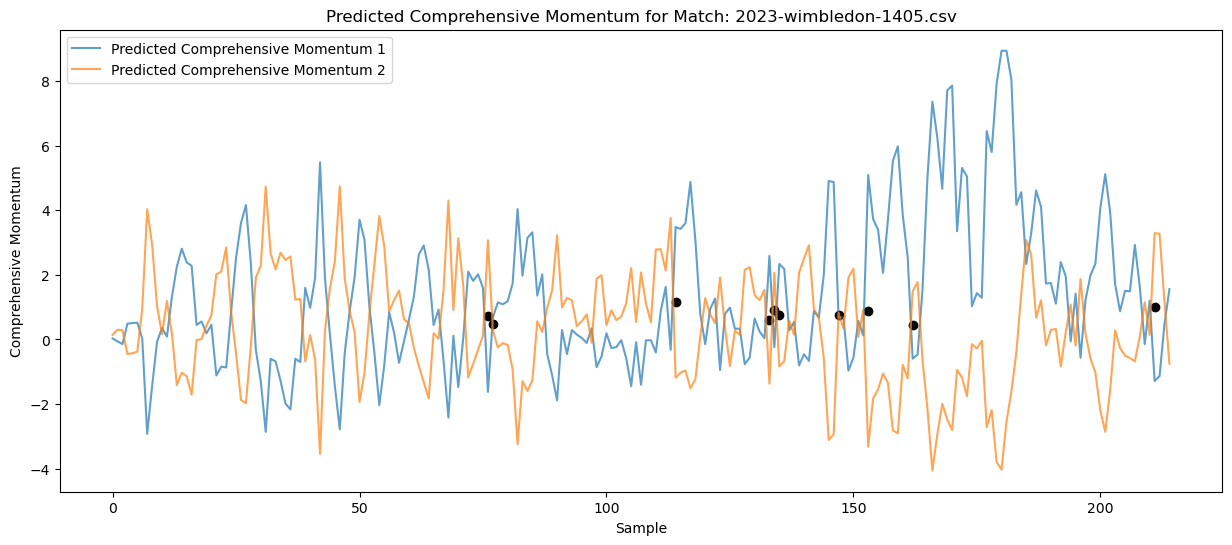

Match: 2023-wimbledon-1406.csv
Intersection 1: (x=6, y=0.62) - Change in Momentum 1: 2.52, Change in Momentum 2: -2.99
Match: 2023-wimbledon-1406.csv
Intersection 2: (x=16, y=0.66) - Change in Momentum 1: -3.43, Change in Momentum 2: 2.82
Match: 2023-wimbledon-1406.csv
Intersection 3: (x=57, y=1.01) - Change in Momentum 1: 5.39, Change in Momentum 2: -4.69
Match: 2023-wimbledon-1406.csv
Intersection 4: (x=73, y=0.92) - Change in Momentum 1: -4.61, Change in Momentum 2: 5.19
Match: 2023-wimbledon-1406.csv
Intersection 5: (x=158, y=2.19) - Change in Momentum 1: -2.90, Change in Momentum 2: 2.73
Match: 2023-wimbledon-1406.csv
Intersection 6: (x=162, y=0.88) - Change in Momentum 1: 4.01, Change in Momentum 2: -5.40
Match: 2023-wimbledon-1406.csv
Intersection 7: (x=171, y=0.88) - Change in Momentum 1: 3.12, Change in Momentum 2: -2.43


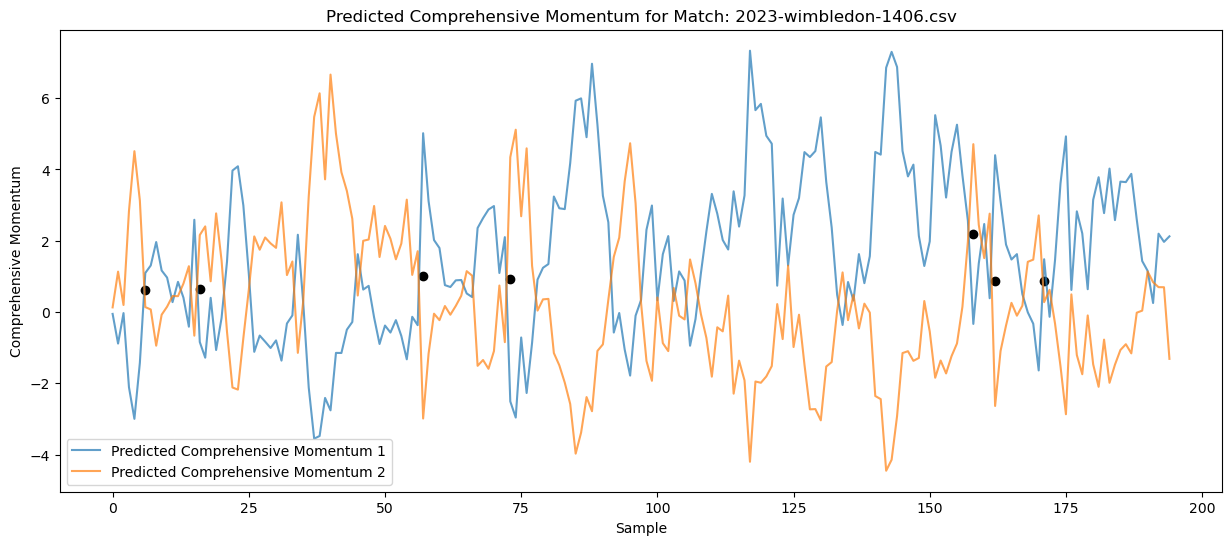

Match: 2023-wimbledon-1407.csv
Intersection 1: (x=44, y=0.71) - Change in Momentum 1: 2.60, Change in Momentum 2: -2.55
Match: 2023-wimbledon-1407.csv
Intersection 2: (x=89, y=1.05) - Change in Momentum 1: 4.11, Change in Momentum 2: -3.81
Match: 2023-wimbledon-1407.csv
Intersection 3: (x=106, y=0.95) - Change in Momentum 1: 3.73, Change in Momentum 2: -3.27
Match: 2023-wimbledon-1407.csv
Intersection 4: (x=119, y=1.41) - Change in Momentum 1: -3.62, Change in Momentum 2: 4.29
Match: 2023-wimbledon-1407.csv
Intersection 5: (x=179, y=0.73) - Change in Momentum 1: -3.05, Change in Momentum 2: 2.88
Match: 2023-wimbledon-1407.csv
Intersection 6: (x=189, y=0.64) - Change in Momentum 1: 2.87, Change in Momentum 2: -2.31
Match: 2023-wimbledon-1407.csv
Intersection 7: (x=190, y=0.5) - Change in Momentum 1: -2.81, Change in Momentum 2: 2.53
Match: 2023-wimbledon-1407.csv
Intersection 8: (x=267, y=0.69) - Change in Momentum 1: 4.63, Change in Momentum 2: -4.92
Match: 2023-wimbledon-1407.csv
Inte

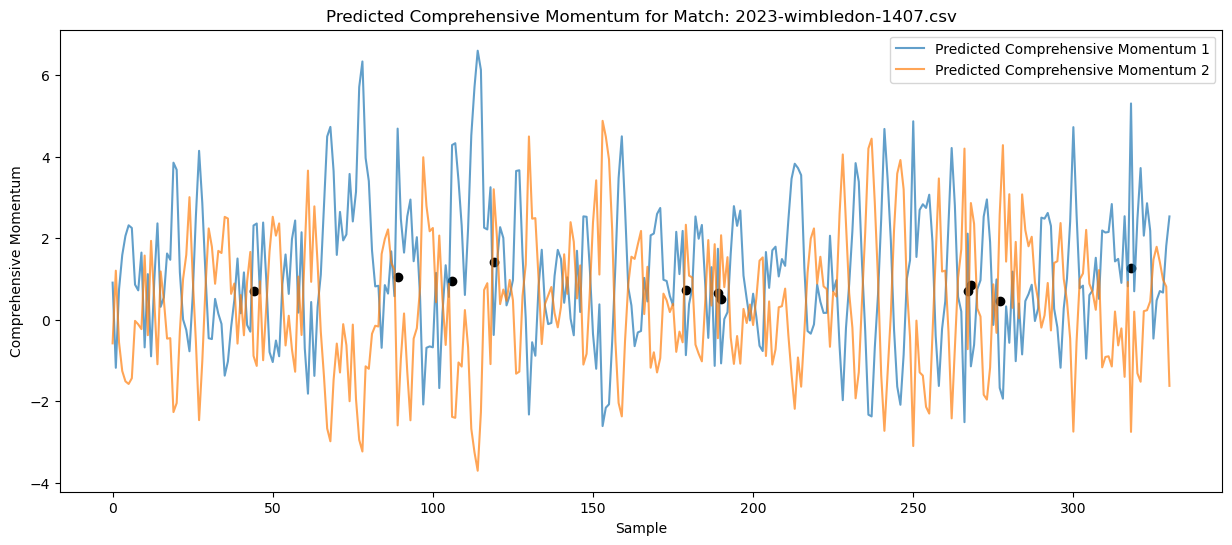

Match: 2023-wimbledon-1408.csv
Intersection 1: (x=9, y=0.94) - Change in Momentum 1: -4.42, Change in Momentum 2: 5.01
Match: 2023-wimbledon-1408.csv
Intersection 2: (x=18, y=0.83) - Change in Momentum 1: 2.60, Change in Momentum 2: -2.56
Match: 2023-wimbledon-1408.csv
Intersection 3: (x=19, y=0.85) - Change in Momentum 1: -3.94, Change in Momentum 2: 3.98
Match: 2023-wimbledon-1408.csv
Intersection 4: (x=34, y=0.59) - Change in Momentum 1: -3.15, Change in Momentum 2: 2.41
Match: 2023-wimbledon-1408.csv
Intersection 5: (x=41, y=0.8) - Change in Momentum 1: 2.36, Change in Momentum 2: -3.17
Match: 2023-wimbledon-1408.csv
Intersection 6: (x=64, y=0.91) - Change in Momentum 1: -2.56, Change in Momentum 2: 3.10
Match: 2023-wimbledon-1408.csv
Intersection 7: (x=103, y=0.95) - Change in Momentum 1: -5.06, Change in Momentum 2: 5.33
Match: 2023-wimbledon-1408.csv
Intersection 8: (x=154, y=0.72) - Change in Momentum 1: -3.81, Change in Momentum 2: 4.38
Match: 2023-wimbledon-1408.csv
Intersect

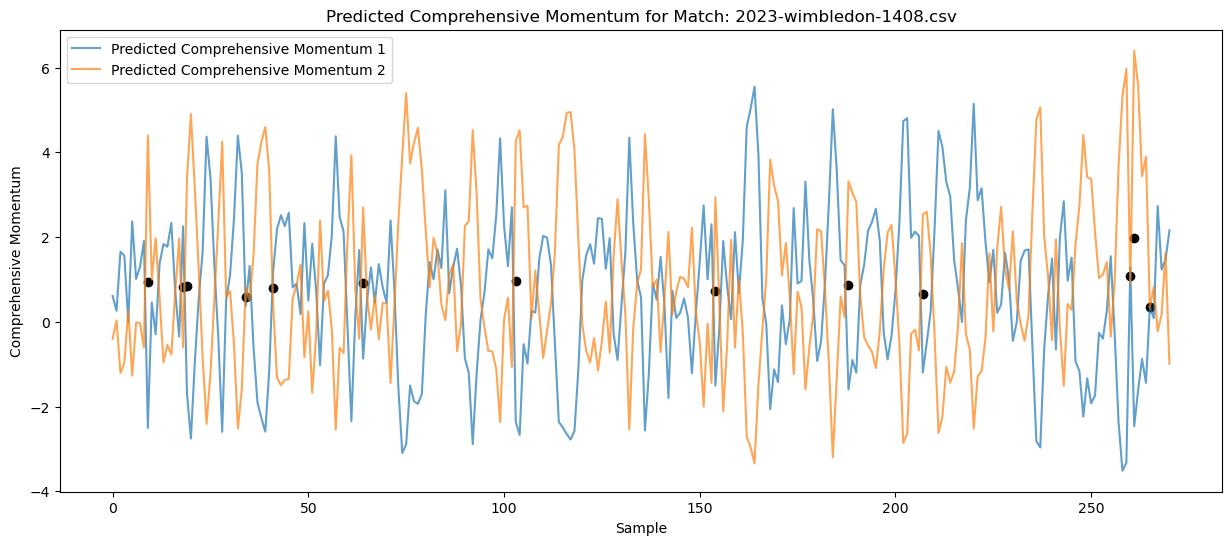

Match: 2023-wimbledon-1501.csv
Intersection 1: (x=32, y=0.53) - Change in Momentum 1: 2.34, Change in Momentum 2: -3.00
Match: 2023-wimbledon-1501.csv
Intersection 2: (x=40, y=1.01) - Change in Momentum 1: -3.75, Change in Momentum 2: 3.81
Match: 2023-wimbledon-1501.csv
Intersection 3: (x=63, y=0.7) - Change in Momentum 1: -2.22, Change in Momentum 2: 3.25
Match: 2023-wimbledon-1501.csv
Intersection 4: (x=137, y=0.68) - Change in Momentum 1: -4.04, Change in Momentum 2: 2.49
Match: 2023-wimbledon-1501.csv
Intersection 5: (x=140, y=1.63) - Change in Momentum 1: -3.96, Change in Momentum 2: 5.20
Match: 2023-wimbledon-1501.csv
Intersection 6: (x=150, y=0.59) - Change in Momentum 1: -3.00, Change in Momentum 2: 2.45
Match: 2023-wimbledon-1501.csv
Intersection 7: (x=159, y=0.63) - Change in Momentum 1: 2.97, Change in Momentum 2: -3.12
Match: 2023-wimbledon-1501.csv
Intersection 8: (x=183, y=0.63) - Change in Momentum 1: -2.77, Change in Momentum 2: 2.53


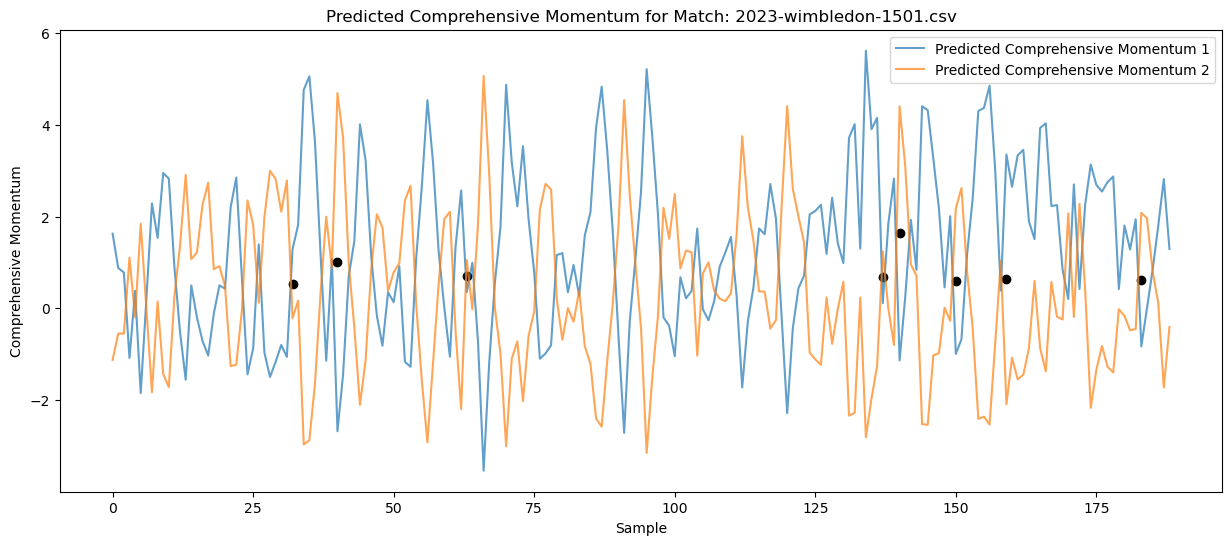

Match: 2023-wimbledon-1502.csv
Intersection 1: (x=7, y=0.53) - Change in Momentum 1: 3.04, Change in Momentum 2: -2.76
Match: 2023-wimbledon-1502.csv
Intersection 2: (x=161, y=0.87) - Change in Momentum 1: 2.62, Change in Momentum 2: -2.82
Match: 2023-wimbledon-1502.csv
Intersection 3: (x=200, y=0.52) - Change in Momentum 1: -3.65, Change in Momentum 2: 2.77
Match: 2023-wimbledon-1502.csv
Intersection 4: (x=211, y=0.97) - Change in Momentum 1: -3.37, Change in Momentum 2: 3.84
Match: 2023-wimbledon-1502.csv
Intersection 5: (x=269, y=1.27) - Change in Momentum 1: 4.38, Change in Momentum 2: -3.34


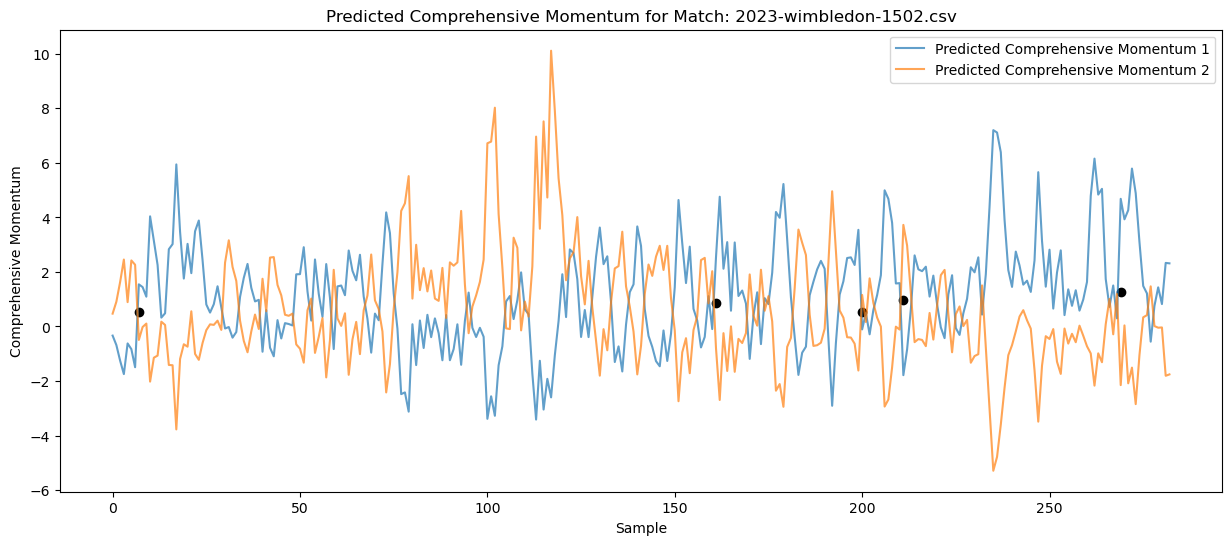

Match: 2023-wimbledon-1503.csv
Intersection 1: (x=28, y=0.45) - Change in Momentum 1: -3.84, Change in Momentum 2: 3.18
Match: 2023-wimbledon-1503.csv
Intersection 2: (x=88, y=1.74) - Change in Momentum 1: -2.04, Change in Momentum 2: 3.93
Match: 2023-wimbledon-1503.csv
Intersection 3: (x=111, y=0.67) - Change in Momentum 1: -2.78, Change in Momentum 2: 2.58
Match: 2023-wimbledon-1503.csv
Intersection 4: (x=151, y=1.19) - Change in Momentum 1: 4.37, Change in Momentum 2: -2.39
Match: 2023-wimbledon-1503.csv
Intersection 5: (x=168, y=0.52) - Change in Momentum 1: -4.47, Change in Momentum 2: 3.33


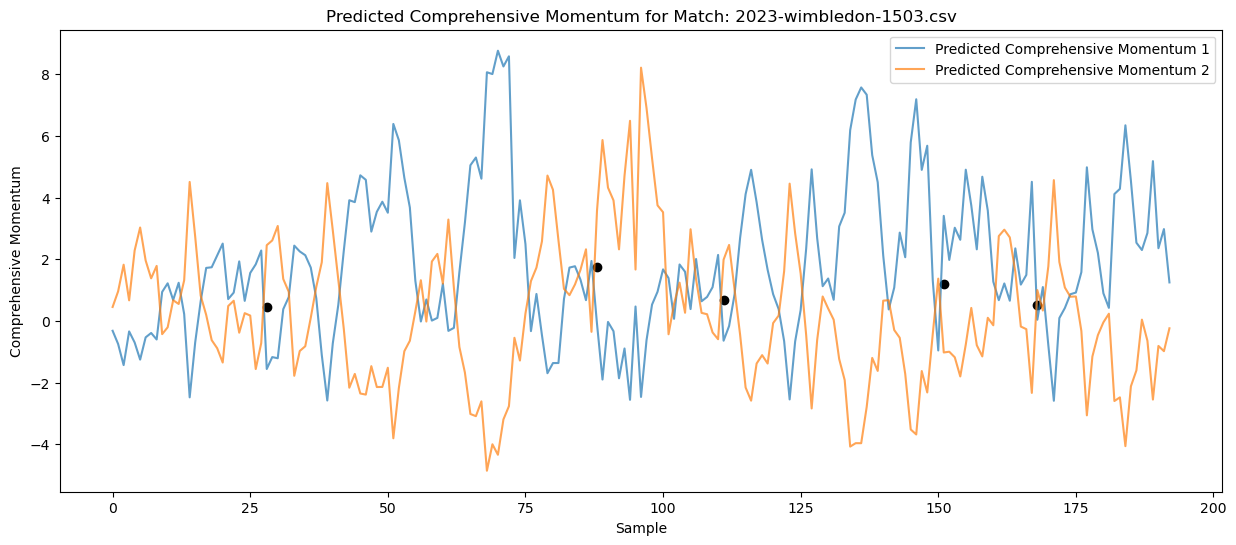

Match: 2023-wimbledon-1504.csv
Intersection 1: (x=6, y=0.39) - Change in Momentum 1: -2.82, Change in Momentum 2: 3.43
Match: 2023-wimbledon-1504.csv
Intersection 2: (x=12, y=0.71) - Change in Momentum 1: 2.94, Change in Momentum 2: -2.19
Match: 2023-wimbledon-1504.csv
Intersection 3: (x=17, y=0.64) - Change in Momentum 1: -3.64, Change in Momentum 2: 4.16
Match: 2023-wimbledon-1504.csv
Intersection 4: (x=36, y=0.53) - Change in Momentum 1: -3.15, Change in Momentum 2: 3.41
Match: 2023-wimbledon-1504.csv
Intersection 5: (x=63, y=0.81) - Change in Momentum 1: -3.14, Change in Momentum 2: 1.89
Match: 2023-wimbledon-1504.csv
Intersection 6: (x=66, y=1.35) - Change in Momentum 1: -3.40, Change in Momentum 2: 4.44
Match: 2023-wimbledon-1504.csv
Intersection 7: (x=103, y=0.73) - Change in Momentum 1: 1.75, Change in Momentum 2: -3.69
Match: 2023-wimbledon-1504.csv
Intersection 8: (x=115, y=0.32) - Change in Momentum 1: -3.76, Change in Momentum 2: 2.61
Match: 2023-wimbledon-1504.csv
Intersec

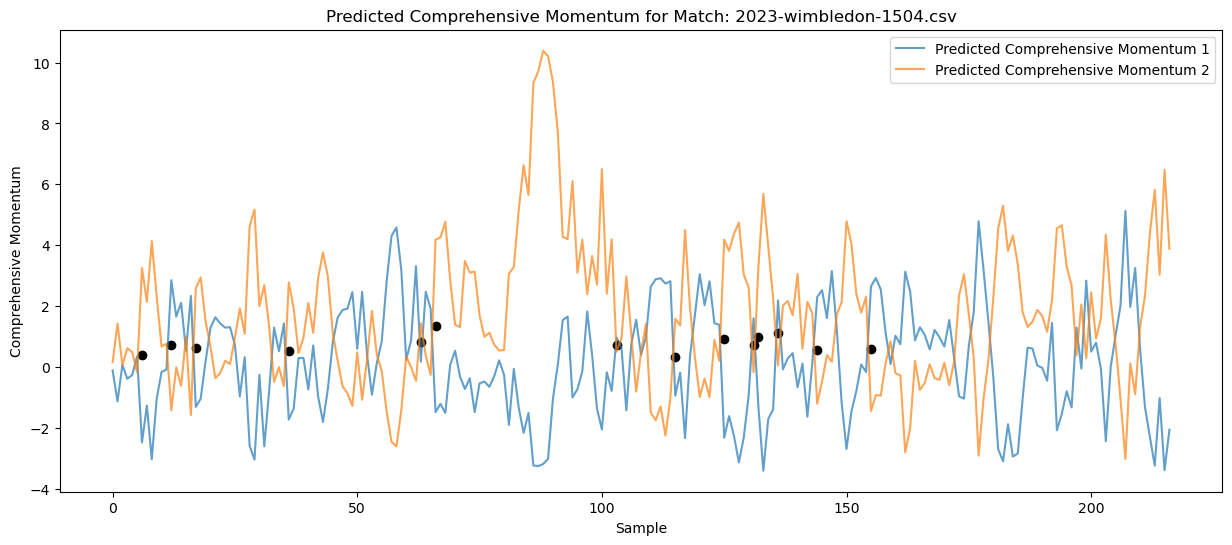

Match: 2023-wimbledon-1601.csv
Intersection 1: (x=19, y=0.58) - Change in Momentum 1: 3.19, Change in Momentum 2: -3.74
Match: 2023-wimbledon-1601.csv
Intersection 2: (x=33, y=0.77) - Change in Momentum 1: 2.61, Change in Momentum 2: -2.70
Match: 2023-wimbledon-1601.csv
Intersection 3: (x=56, y=1.36) - Change in Momentum 1: -3.71, Change in Momentum 2: 5.00
Match: 2023-wimbledon-1601.csv
Intersection 4: (x=129, y=2.0) - Change in Momentum 1: 4.27, Change in Momentum 2: -4.26


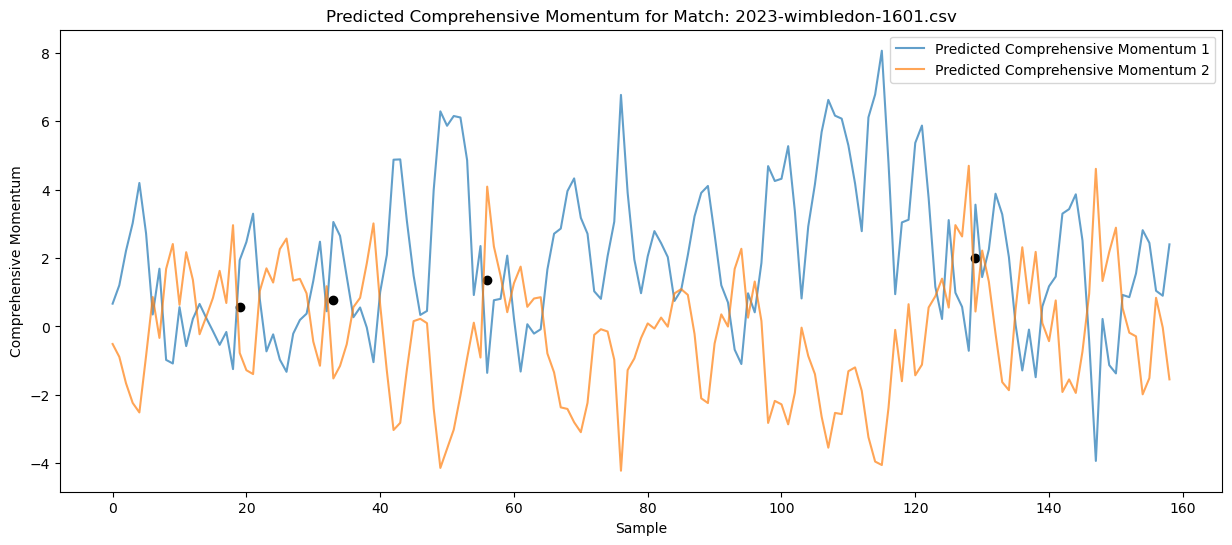

Match: 2023-wimbledon-1602.csv
Intersection 1: (x=4, y=0.01) - Change in Momentum 1: 2.46, Change in Momentum 2: -2.86
Match: 2023-wimbledon-1602.csv
Intersection 2: (x=27, y=0.82) - Change in Momentum 1: -3.18, Change in Momentum 2: 3.63
Match: 2023-wimbledon-1602.csv
Intersection 3: (x=40, y=1.16) - Change in Momentum 1: -2.96, Change in Momentum 2: 3.34
Match: 2023-wimbledon-1602.csv
Intersection 4: (x=92, y=0.53) - Change in Momentum 1: -2.38, Change in Momentum 2: 2.81
Match: 2023-wimbledon-1602.csv
Intersection 5: (x=105, y=0.89) - Change in Momentum 1: -3.60, Change in Momentum 2: 3.25
Match: 2023-wimbledon-1602.csv
Intersection 6: (x=107, y=0.47) - Change in Momentum 1: -3.16, Change in Momentum 2: 2.21
Match: 2023-wimbledon-1602.csv
Intersection 7: (x=193, y=0.59) - Change in Momentum 1: -2.77, Change in Momentum 2: 2.93


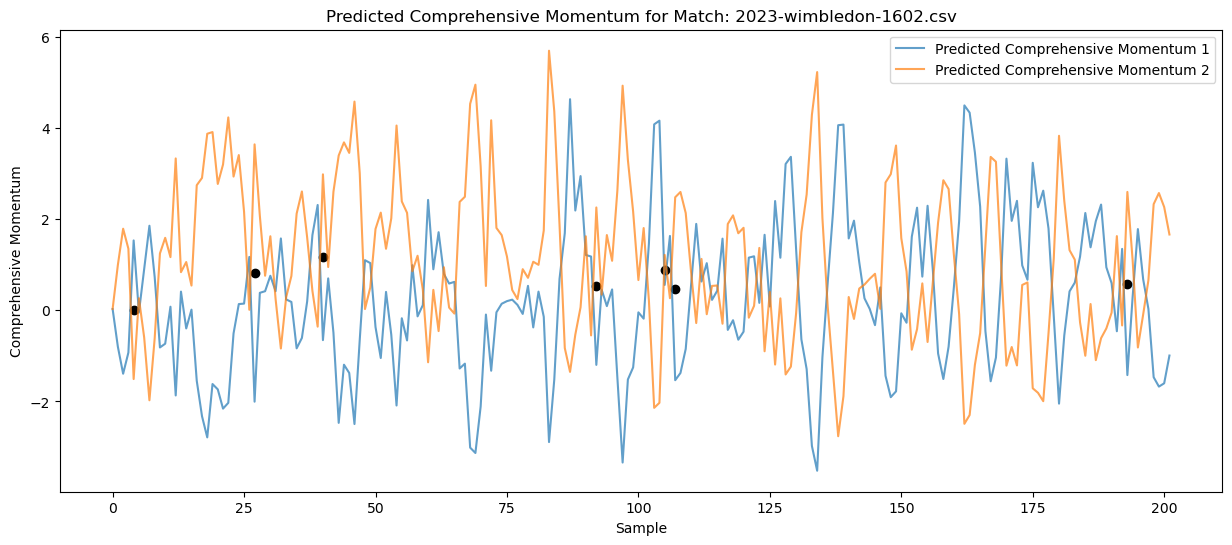

Match: 2023-wimbledon-1701.csv
Intersection 1: (x=67, y=0.14) - Change in Momentum 1: -4.78, Change in Momentum 2: 3.60
Match: 2023-wimbledon-1701.csv
Intersection 2: (x=74, y=0.47) - Change in Momentum 1: -4.17, Change in Momentum 2: 4.51
Match: 2023-wimbledon-1701.csv
Intersection 3: (x=82, y=0.34) - Change in Momentum 1: -2.83, Change in Momentum 2: 2.45
Match: 2023-wimbledon-1701.csv
Intersection 4: (x=86, y=0.95) - Change in Momentum 1: 3.69, Change in Momentum 2: -2.30
Match: 2023-wimbledon-1701.csv
Intersection 5: (x=102, y=0.84) - Change in Momentum 1: -3.64, Change in Momentum 2: 3.95
Match: 2023-wimbledon-1701.csv
Intersection 6: (x=105, y=0.49) - Change in Momentum 1: 2.26, Change in Momentum 2: -2.87
Match: 2023-wimbledon-1701.csv
Intersection 7: (x=125, y=0.6) - Change in Momentum 1: -3.91, Change in Momentum 2: 3.21
Match: 2023-wimbledon-1701.csv
Intersection 8: (x=129, y=0.45) - Change in Momentum 1: 3.63, Change in Momentum 2: -4.90
Match: 2023-wimbledon-1701.csv
Inters

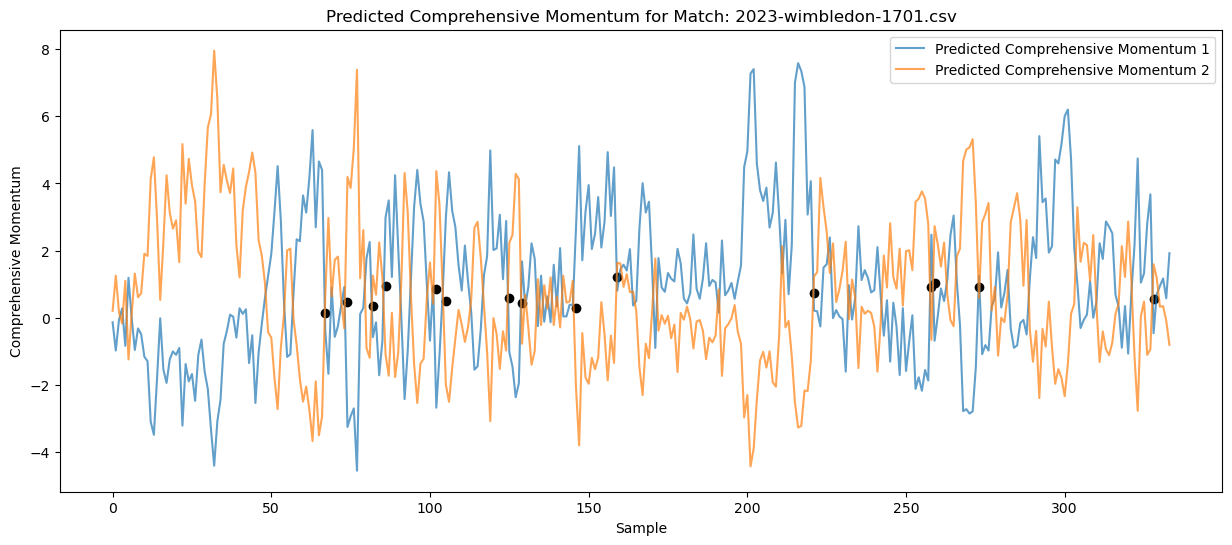

In [20]:
import os
# 为每场比赛单独进行预测并绘制曲线
for file in file_list:
    df = pd.read_csv(file)

    # 创建特征列的副本来处理缺失值
    features_df = df[feature_columns].copy()
    features_df = features_df.apply(pd.to_numeric, errors='coerce')
    features_df.fillna(features_df.mean(), inplace=True)

    # 检查是否还有缺失值
    if features_df.isnull().values.any():
        print(f"Warning: Missing values detected in file {file}.")
        continue

    # 标准化
    X_match = scaler.transform(features_df)

    # 预测
    y_pred_match = model.predict(X_match)

    # 寻找交点
    intersections = find_intersections_and_changes(y_pred_match[:, 0], y_pred_match[:, 1])

    # 打印交点信息和分数变化
    for i, (x, y, change_1, change_2) in enumerate(intersections, 1):        
        print(f"Match: {os.path.basename(file)}")
        print(f"Intersection {i}: (x={x}, y={round(y, 2)}) - Change in Momentum 1: {change_1:.2f}, Change in Momentum 2: {change_2:.2f}")

    # 绘制曲线
    plt.figure(figsize=(15, 6))
    plt.plot(y_pred_match[:, 0], label='Predicted Comprehensive Momentum 1', alpha=0.7)
    plt.plot(y_pred_match[:, 1], label='Predicted Comprehensive Momentum 2', alpha=0.7)
    for x, y, _, _ in intersections:
        plt.scatter(x, y, color='black')
    plt.title(f'Predicted Comprehensive Momentum for Match: {os.path.basename(file)}')
    plt.xlabel('Sample')
    plt.ylabel('Comprehensive Momentum')
    plt.legend()
    plt.show()